In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
import plotly.graph_objects as go
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MaxAbsScaler
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/machinelearningoncloud/imputed_data.csv")
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,6.163893,13246.899910,60,"6,52,230",33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,6.163893,13246.899910,60,"6,52,230",33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,6.163893,179.426579,60,"6,52,230",33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,"6,52,230",33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,"6,52,230",33.93911,67.709953


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3648 non-null   object 
 1   Year                                                              3648 non-null   int64  
 2   Access to electricity (% of population)                           3648 non-null   float64
 3   Access to clean fuels for cooking                                 3648 non-null   float64
 4   Renewable energy share in the total final energy consumption (%)  3648 non-null   float64
 5   Electricity from fossil fuels (TWh)                               3648 non-null   float64
 6   Electricity from nuclear (TWh)                                    3648 non-null   float64
 7   Electricity from renewables (TWh)

In [ ]:
# Replace commas with spaces
df['Density (P/Km2)'] = df['Density (P/Km2)'].str.replace(',', ' ')

# Remove spaces
df['Density (P/Km2)'] = df['Density (P/Km2)'].str.replace(' ', '')

# Convert 'Density (P/Km2)' column to numeric
df['Density (P/Km2)'] = pd.to_numeric(df['Density (P/Km2)'], errors='coerce')

In [ ]:
# Replace commas with spaces
df['Land Area(Km2)'] = df['Land Area(Km2)'].str.replace(',', ' ')

# Remove spaces
df['Land Area(Km2)'] = df['Land Area(Km2)'].str.replace(' ', '')

# Convert 'Density (P/Km2)' column to numeric
df['Land Area(Km2)'] = pd.to_numeric(df['Land Area(Km2)'], errors='coerce')

print(df.dtypes)


Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_emissions_kt_by_country                                   float64
gdp_growth                                                          float64
gdp_per_capi

In [ ]:
# Convert columns of type int64 to float64
df = df.astype({'Density (P/Km2)': 'float64', 'Land Area(Km2)': 'float64'})

# Verify the conversion by checking the data types again
print(df.dtypes)


Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_emissions_kt_by_country                                   float64
gdp_growth                                                          float64
gdp_per_capi

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,3648.0,2010.041118,6.052776e+00,2000.000000,2005.000000,2010.000000,2015.000000,2.020000e+03
Access to electricity (% of population),3648.0,78.933702,3.023816e+01,1.252269,59.916941,98.272340,100.000000,1.000000e+02
Access to clean fuels for cooking,3648.0,63.255287,3.813378e+01,0.000000,25.862500,78.875000,100.000000,1.000000e+02
Renewable energy share in the total final energy consumption (%),3648.0,32.626311,2.978635e+01,0.000000,6.560000,23.690000,54.820000,9.604000e+01
Electricity from fossil fuels (TWh),3648.0,69.979112,3.471351e+02,0.000000,0.280000,2.940000,26.527500,5.184130e+03
Electricity from nuclear (TWh),3648.0,12.989315,7.178629e+01,0.000000,0.000000,0.000000,0.000000,8.094100e+02
Electricity from renewables (TWh),3648.0,23.836606,1.041594e+02,0.000000,0.040000,1.420000,9.560000,2.184940e+03
Low-carbon electricity (% electricity),3648.0,36.811387,3.411601e+01,0.000000,3.030303,28.571428,64.038130,1.000000e+02
Primary energy consumption per capita (kWh/person),3648.0,25747.285360,3.477742e+04,0.000000,3116.636825,13118.841000,33897.402500,2.625857e+05
Energy intensity level of primary energy (MJ/$2017 PPP GDP),3648.0,5.296939,3.505246e+00,0.110000,3.170000,4.320000,6.000000,3.257000e+01


In [ ]:
# Specify the path for the new CSV file
new_csv_path = "/content/drive/MyDrive/machinelearningoncloud/imputed_data_numeric.csv"

# Save the DataFrame to a new CSV file
df.to_csv(new_csv_path, index=False)

print("New CSV file saved successfully.")

df_copy = df.copy()
df_copy

New CSV file saved successfully.


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,6.163893,13246.899910,60.0,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,6.163893,13246.899910,60.0,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,6.163893,179.426579,60.0,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,Zimbabwe,2016,42.561730,29.8,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38.0,390757.0,-19.015438,29.154857
3644,Zimbabwe,2017,44.178635,29.8,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38.0,390757.0,-19.015438,29.154857
3645,Zimbabwe,2018,45.572647,29.9,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38.0,390757.0,-19.015438,29.154857
3646,Zimbabwe,2019,46.781475,30.1,81.50,3.66,0.0,4.58,55.582527,3003.65530,10.47,11760.000230,-6.144236,1316.740657,38.0,390757.0,-19.015438,29.154857


In [ ]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Entity' column to label encode the entities
df['Entity'] = label_encoder.fit_transform(df['Entity'])

# Display the first few rows to verify the label encoding
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
0,0,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,6.163893,13246.899910,60.0,652230.0,33.939110,67.709953
1,0,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,6.163893,13246.899910,60.0,652230.0,33.939110,67.709953
2,0,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,6.163893,179.426579,60.0,652230.0,33.939110,67.709953
3,0,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.939110,67.709953
4,0,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,174,2016,42.561730,29.8,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38.0,390757.0,-19.015438,29.154857
3644,174,2017,44.178635,29.8,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38.0,390757.0,-19.015438,29.154857
3645,174,2018,45.572647,29.9,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38.0,390757.0,-19.015438,29.154857
3646,174,2019,46.781475,30.1,81.50,3.66,0.0,4.58,55.582527,3003.65530,10.47,11760.000230,-6.144236,1316.740657,38.0,390757.0,-19.015438,29.154857


In [ ]:
# Count the unique entities in df_copy
unique_entities = df_copy['Entity'].unique()

# Sort the unique entities
unique_entities_sorted = sorted(unique_entities)

# Create a dictionary to map entities to their index
entity_index_map = {entity: index for index, entity in enumerate(unique_entities_sorted)}

# Print the entity index map
print("Entity Index Map:")
for entity, index in entity_index_map.items():
    print(f"Entity: {entity}, Index: {index}")

# Count the number of unique entities
num_entities = len(unique_entities)
print(f"\nTotal number of entities in df_copy: {num_entities}")


Entity Index Map:
Entity: Afghanistan, Index: 0
Entity: Albania, Index: 1
Entity: Algeria, Index: 2
Entity: Angola, Index: 3
Entity: Antigua and Barbuda, Index: 4
Entity: Argentina, Index: 5
Entity: Armenia, Index: 6
Entity: Aruba, Index: 7
Entity: Australia, Index: 8
Entity: Austria, Index: 9
Entity: Azerbaijan, Index: 10
Entity: Bahamas, Index: 11
Entity: Bahrain, Index: 12
Entity: Bangladesh, Index: 13
Entity: Barbados, Index: 14
Entity: Belarus, Index: 15
Entity: Belgium, Index: 16
Entity: Belize, Index: 17
Entity: Benin, Index: 18
Entity: Bermuda, Index: 19
Entity: Bhutan, Index: 20
Entity: Bosnia and Herzegovina, Index: 21
Entity: Botswana, Index: 22
Entity: Brazil, Index: 23
Entity: Bulgaria, Index: 24
Entity: Burkina Faso, Index: 25
Entity: Burundi, Index: 26
Entity: Cambodia, Index: 27
Entity: Cameroon, Index: 28
Entity: Canada, Index: 29
Entity: Cayman Islands, Index: 30
Entity: Central African Republic, Index: 31
Entity: Chad, Index: 32
Entity: Chile, Index: 33
Entity: China

In [ ]:
# Entities to find
entities_to_find = ['Bhutan', 'Eritrea', 'Lebanon', 'Uruguay']

# Print the index corresponding to each entity in the list
for entity in entities_to_find:
    if entity in entity_index_map:
        index = entity_index_map[entity]
        print(f"Entity: {entity} corresponds to Index: {index}")
    else:
        print(f"No index found for entity: {entity}.")


Entity: Bhutan corresponds to Index: 20
Entity: Eritrea corresponds to Index: 51
Entity: Lebanon corresponds to Index: 88
Entity: Uruguay corresponds to Index: 169


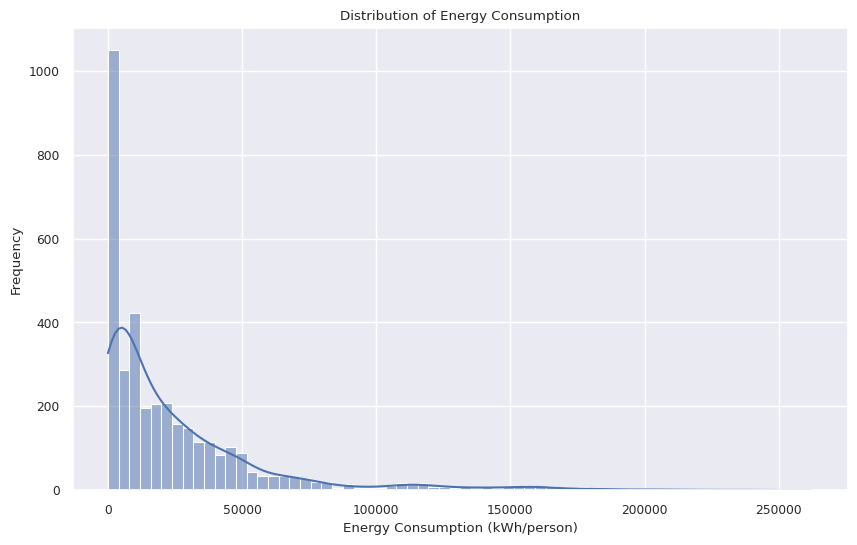

In [ ]:
# Plot a histogram for energy consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['Primary energy consumption per capita (kWh/person)'], kde=True)
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Frequency')
plt.show()


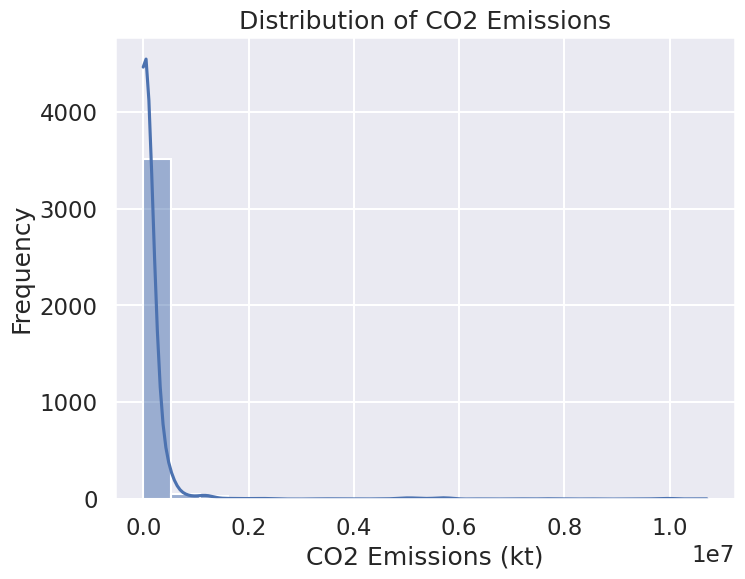

In [ ]:
# Set the context to 'talk' to reduce the scale size
sns.set_context("talk")

# Assuming 'df' is your DataFrame with CO2 emission data

# Plot a histogram for CO2 emissions with reduced frequency scale
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.histplot(df['Value_co2_emissions_kt_by_country'], bins=20, kde=True)  # Adjust the number of bins
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (kt)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Extract the 'Entity' column
entity_column = df['Entity']

# Exclude the 'Entity' column from the data to be normalized
data_to_normalize = df.drop(columns=['Entity'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data (excluding 'Entity' column)
normalized_data = scaler.fit_transform(data_to_normalize)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=data_to_normalize.columns)

# Add the 'Entity' column back to the DataFrame
normalized_df.insert(0, 'Entity', entity_column)

# Display the normalized DataFrame
normalized_df


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
0,0,0.00,0.003659,0.062,0.468451,0.000031,0.0,0.000142,0.659574,0.001152,0.047135,0.000070,0.368435,0.106440,0.006941,0.065321,0.706944,0.687612
1,0,0.05,0.028581,0.072,0.474802,0.000017,0.0,0.000229,0.847458,0.000902,0.050216,0.000067,0.368435,0.106440,0.006941,0.065321,0.706944,0.687612
2,0,0.10,0.082603,0.082,0.393898,0.000025,0.0,0.000256,0.811594,0.000803,0.039741,0.000095,0.368435,0.000547,0.006941,0.065321,0.706944,0.687612
3,0,0.15,0.136573,0.095,0.381716,0.000060,0.0,0.000288,0.670213,0.000876,0.039741,0.000113,0.382842,0.000638,0.006941,0.065321,0.706944,0.687612
4,0,0.20,0.190513,0.109,0.460641,0.000064,0.0,0.000256,0.629213,0.000778,0.033580,0.000095,0.342790,0.000806,0.006941,0.065321,0.706944,0.687612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,174,0.80,0.418333,0.298,0.852770,0.000675,0.0,0.001519,0.486803,0.012292,0.304683,0.001028,0.339236,0.010961,0.004308,0.039134,0.206729,0.578473
3644,174,0.85,0.434707,0.298,0.858601,0.000588,0.0,0.001968,0.585034,0.011684,0.289587,0.000965,0.360582,0.009102,0.004308,0.039134,0.206729,0.578473
3645,174,0.90,0.448824,0.299,0.835381,0.000720,0.0,0.002499,0.594124,0.013108,0.299445,0.001155,0.361202,0.009260,0.004308,0.039134,0.206729,0.578473
3646,174,0.95,0.461066,0.301,0.848605,0.000706,0.0,0.002096,0.555825,0.011439,0.319162,0.001097,0.301982,0.009763,0.004308,0.039134,0.206729,0.578473


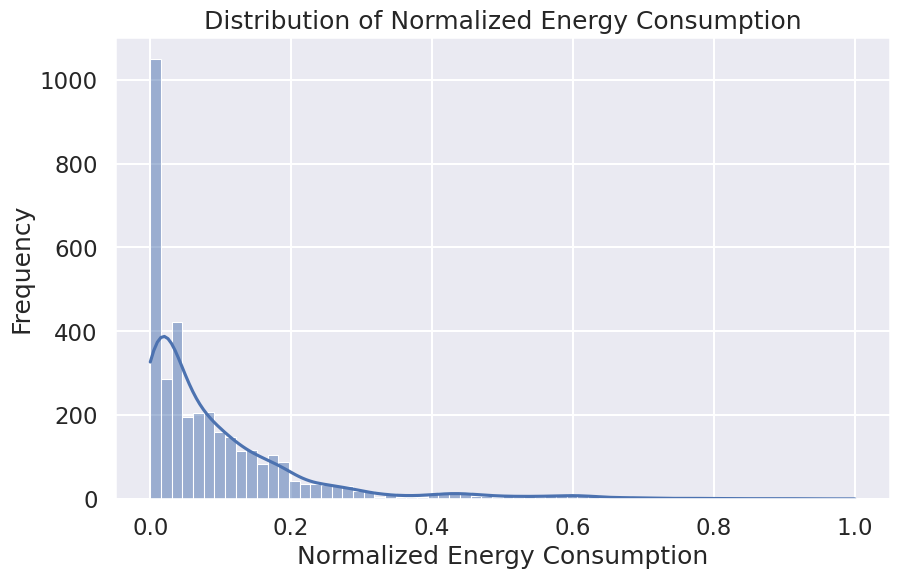

In [ ]:
# Plot a histogram for normalized energy consumption
plt.figure(figsize=(10, 6))
sns.histplot(normalized_df['Primary energy consumption per capita (kWh/person)'], kde=True)
plt.title('Distribution of Normalized Energy Consumption')
plt.xlabel('Normalized Energy Consumption')
plt.ylabel('Frequency')
plt.show()


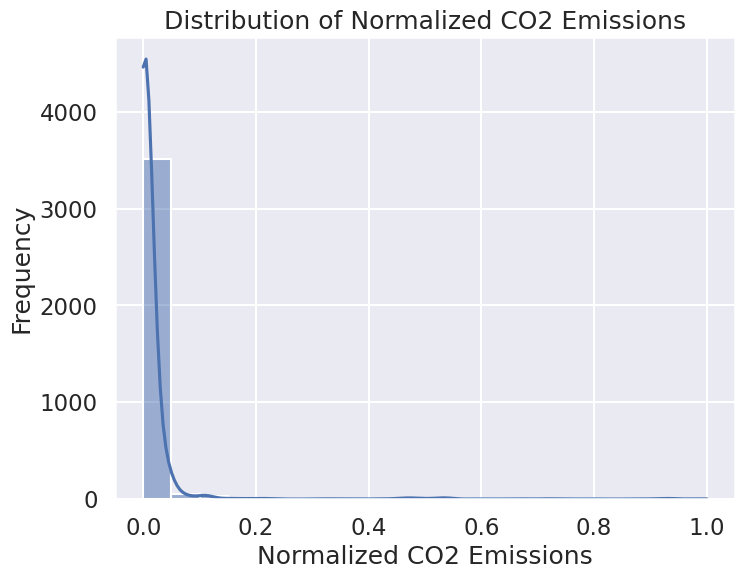

In [ ]:
# Plot a histogram for normalized CO2 emissions
plt.figure(figsize=(8, 6))
sns.histplot(normalized_df['Value_co2_emissions_kt_by_country'], bins=20, kde=True)
plt.title('Distribution of Normalized CO2 Emissions')
plt.xlabel('Normalized CO2 Emissions')
plt.ylabel('Frequency')
plt.show()


                                                      Entity      Year  \
Entity                                              1.000000  0.005923   
Year                                                0.005923  1.000000   
Access to electricity (% of population)            -0.016852  0.124628   
Access to clean fuels for cooking                  -0.010596  0.071582   
Renewable energy share in the total final energ... -0.003086 -0.027536   
Electricity from fossil fuels (TWh)                 0.024766  0.032446   
Electricity from nuclear (TWh)                      0.083390 -0.004777   
Electricity from renewables (TWh)                  -0.050184  0.073643   
Low-carbon electricity (% electricity)             -0.035721  0.029478   
Primary energy consumption per capita (kWh/person)  0.063361  0.004040   
Energy intensity level of primary energy (MJ/$2...  0.143670 -0.150121   
Value_co2_emissions_kt_by_country                   0.008798  0.020512   
gdp_growth                            

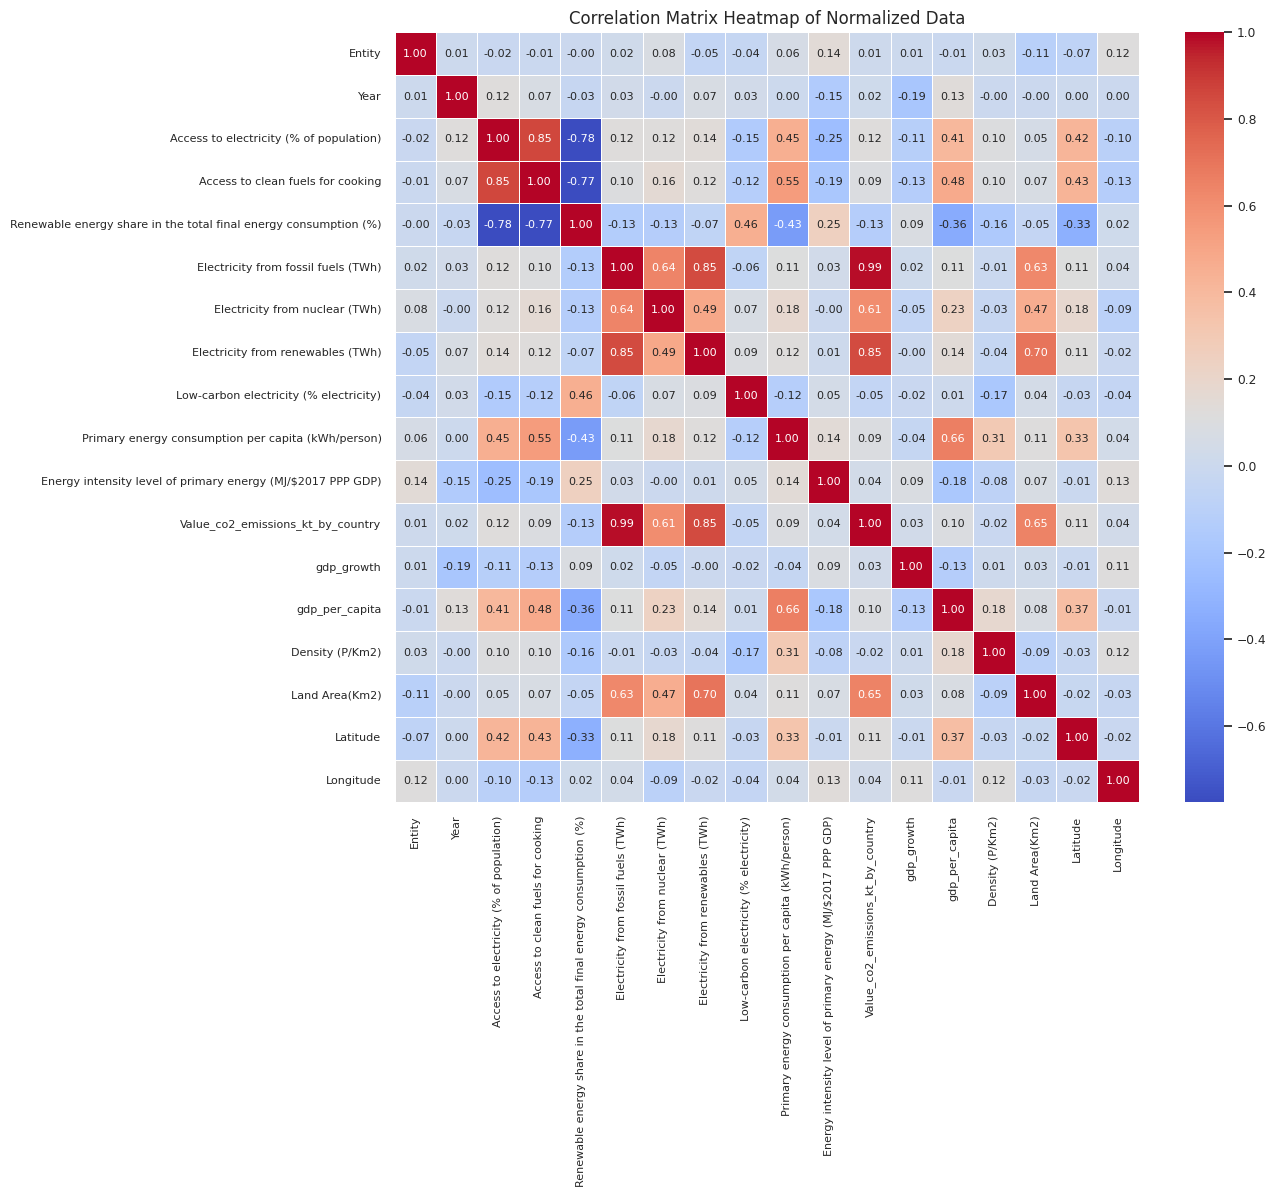

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = normalized_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Set the font scale for seaborn
sns.set(font_scale=0.8)  # Adjust the font scale as needed

# Plot heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})

# Reduce the font size of x and y labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=8)

plt.title('Correlation Matrix Heatmap of Normalized Data', fontsize=12)
plt.show()


<ipython-input-220-054fcc5069a5>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


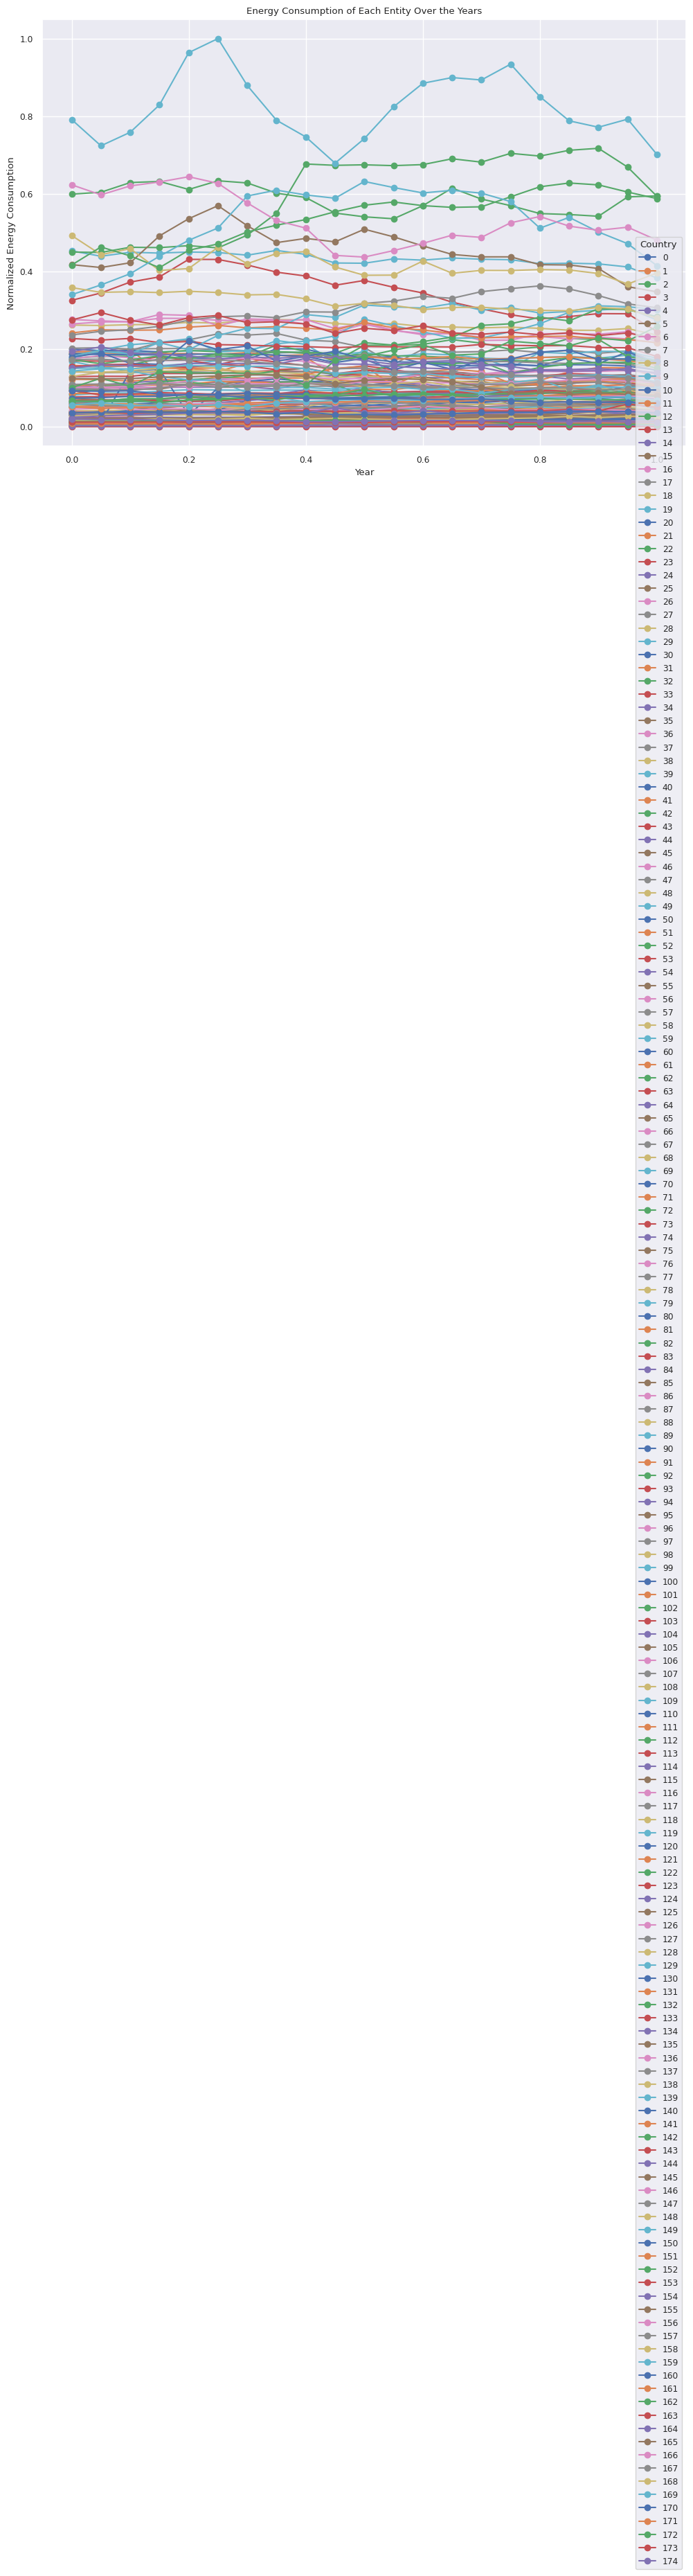

In [ ]:
import matplotlib.pyplot as plt

# Plot a graph for energy consumption of each entity over the years
plt.figure(figsize=(12, 8))
for entity in normalized_df['Entity'].unique():
    entity_data = normalized_df[normalized_df['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['Primary energy consumption per capita (kWh/person)'], marker='o', label=entity)

plt.title('Energy Consumption of Each Entity Over the Years')
plt.xlabel('Year')
plt.ylabel('Normalized Energy Consumption')
plt.legend(title='Country', loc='upper right', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-221-b21227662786>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


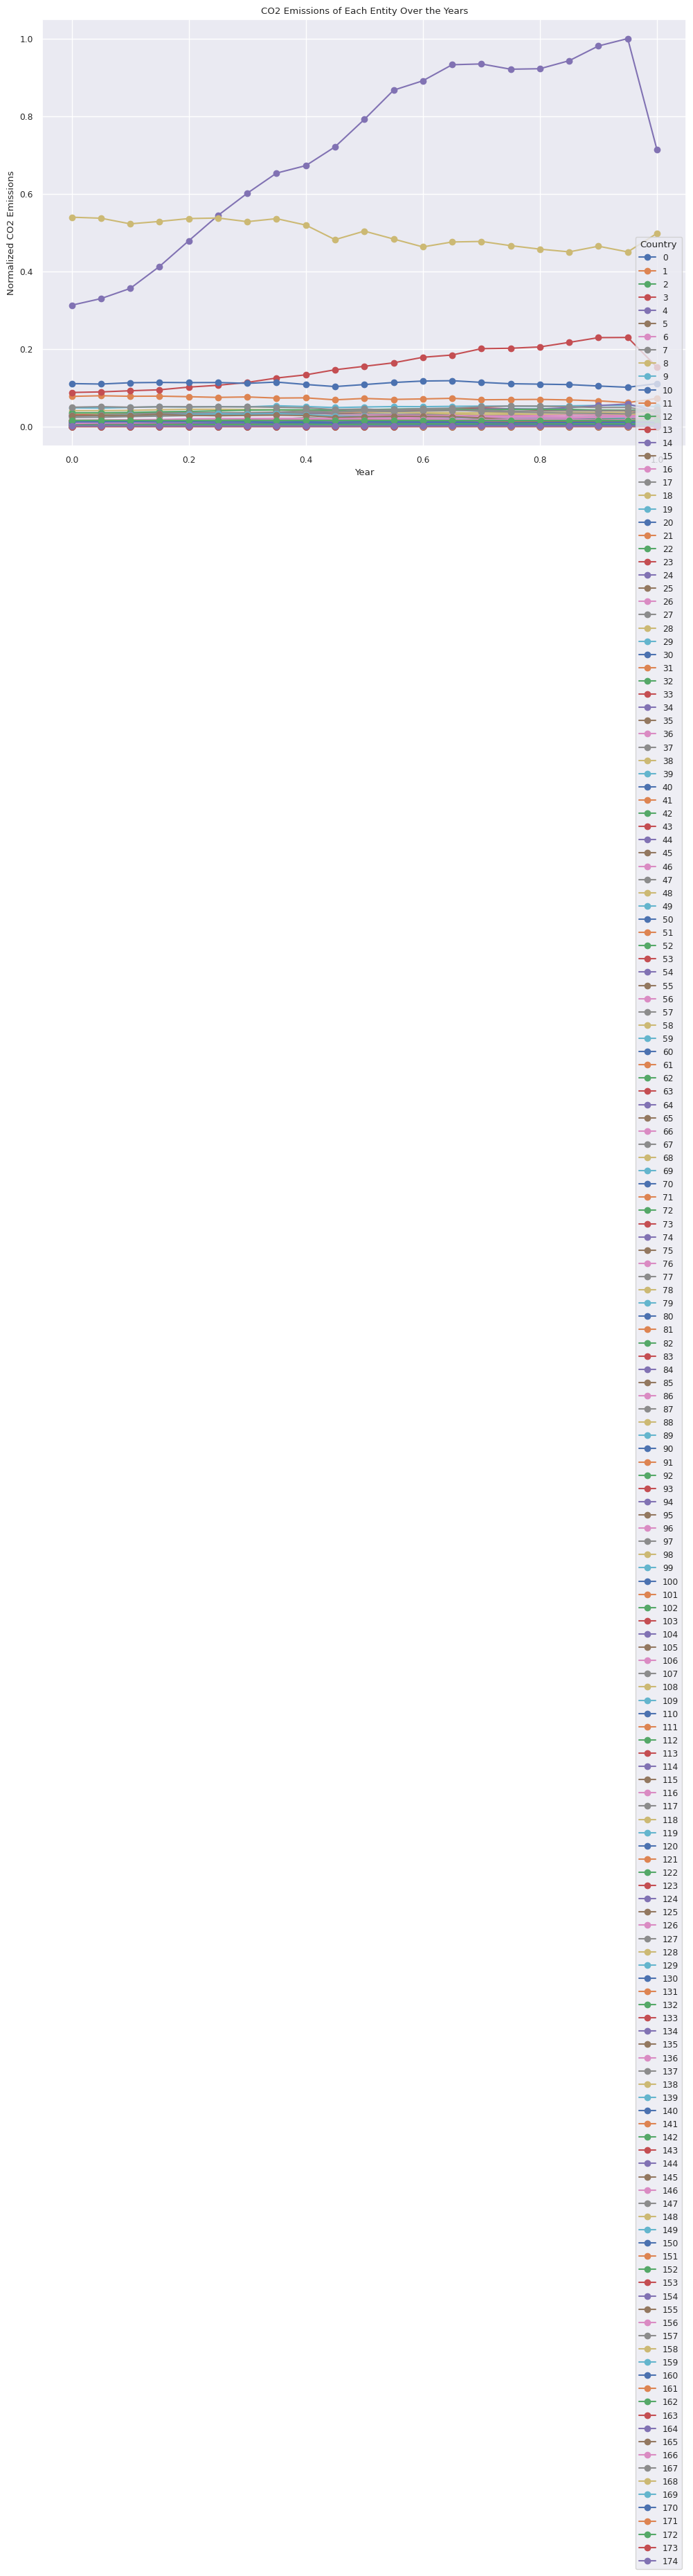

In [ ]:
import matplotlib.pyplot as plt

# Plot a graph for CO2 emissions of each entity over the years
plt.figure(figsize=(12, 8))
for entity in normalized_df['Entity'].unique():
    entity_data = normalized_df[normalized_df['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['Value_co2_emissions_kt_by_country'], marker='o', label=entity)

plt.title('CO2 Emissions of Each Entity Over the Years')
plt.xlabel('Year')
plt.ylabel('Normalized CO2 Emissions')
plt.legend(title='Country', loc='upper right', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
!pip install statsmodels

In [ ]:
print(normalized_df.columns)


Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Density (P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Prepare the independent and dependent variables
X1 = normalized_df['Electricity from fossil fuels (TWh)']
y1 = normalized_df['Value_co2_emissions_kt_by_country']

# Add a constant to the independent variable (intercept term)
X1 = sm.add_constant(X1)

# Fit the OLS model
model = sm.OLS(y1, X1).fit()

# Print the summary of the regression
print(model.summary())


                                    OLS Regression Results                                   
Dep. Variable:     Value_co2_emissions_kt_by_country   R-squared:                       0.971
Model:                                           OLS   Adj. R-squared:                  0.971
Method:                                Least Squares   F-statistic:                 1.223e+05
Date:                               Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                                       05:13:04   Log-Likelihood:                 11014.
No. Observations:                               3648   AIC:                        -2.202e+04
Df Residuals:                                   3646   BIC:                        -2.201e+04
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                                          coef    std err   

In [ ]:
# Define the target columns (energy consumption and CO2 emissions)
target_columns = ['Primary energy consumption per capita (kWh/person)', 'Value_co2_emissions_kt_by_country']

# Define the feature columns (excluding 'Entity' and 'Year' columns)
feature_columns = [col for col in normalized_df.columns if col not in ['Entity', 'Year']]

# Separate target and feature columns
target_data = normalized_df[target_columns]
feature_data = normalized_df[feature_columns]

# Display the shapes of the separated dataframes
print("Target Data Shape:", target_data.shape)
print("Feature Data Shape:", feature_data.shape)


Target Data Shape: (3648, 2)
Feature Data Shape: (3648, 16)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/machinelearningoncloud/imputed_data_numeric.csv")

# Preprocess the data
# Label encode the 'Entity' column
label_encoder = LabelEncoder()
df['Entity'] = label_encoder.fit_transform(df['Entity'])

# Extract the features and target variables
X = df.drop(columns=['Primary energy consumption per capita (kWh/person)', 'Value_co2_emissions_kt_by_country'])
y_energy = df['Primary energy consumption per capita (kWh/person)']
y_co2 = df['Value_co2_emissions_kt_by_country']

# Normalize the feature data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the SVR model
svr = SVR(kernel='linear')

# Function to perform RFE and get the ranking of features for a given target
def get_feature_ranking(X, y, svr, n_features_to_select=10):
    rfe = RFE(estimator=svr, n_features_to_select=n_features_to_select)
    rfe.fit(X, y)
    return rfe.ranking_

# Get feature rankings for both target variables
ranking_y1 = get_feature_ranking(X_scaled, y_energy, svr)
ranking_y2 = get_feature_ranking(X_scaled, y_co2, svr)

# Combine rankings: sum the rankings of both target variables
combined_ranking = ranking_y1 + ranking_y2

# Get the top 10 features based on the combined ranking
top_indices = np.argsort(combined_ranking)[:10]
top_features = np.array(X.columns)[top_indices]

print("Top 10 features selected by combined RFE with SVR:")
print(top_features)

# Optionally, print the combined ranking of all features
feature_rankings = sorted(zip(X.columns, combined_ranking), key=lambda x: x[1])
print("\nCombined feature ranking:")
for feature, rank in feature_rankings:
    print(f"{feature}: {rank}")


Top 10 features selected by combined RFE with SVR:
['Access to electricity (% of population)'
 'Access to clean fuels for cooking'
 'Renewable energy share in the total final energy consumption (%)'
 'Electricity from fossil fuels (TWh)' 'Electricity from nuclear (TWh)'
 'Low-carbon electricity (% electricity)' 'gdp_per_capita'
 'Land Area(Km2)' 'Latitude' 'Year']

Combined feature ranking:
Access to electricity (% of population): 2
Access to clean fuels for cooking: 2
Renewable energy share in the total final energy consumption (%): 2
Electricity from fossil fuels (TWh): 2
Electricity from nuclear (TWh): 2
Low-carbon electricity (% electricity): 2
gdp_per_capita: 2
Land Area(Km2): 2
Latitude: 2
Year: 3
Entity: 6
Electricity from renewables (TWh): 6
Density (P/Km2): 8
Longitude: 8
Energy intensity level of primary energy (MJ/$2017 PPP GDP): 12
gdp_growth: 13


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Define the number of folds (k)
num_folds = 5

# Initialize the k-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error

# Define a dictionary to map model names to their respective model classes
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "MLP": MLPRegressor(),
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor()
}

# Initialize an empty dictionary to store the performance metrics for each model
kf5_model_metrics_energy = {}

# Iterate over each model
for model_name, model in models.items():
    print(f"\nModel: {model_name}")

    # Initialize empty lists to store the metrics for each fold
    rmse_scores = []
    mae_scores = []
    r2_scores = []

    # Iterate over each fold
    for fold, (train_index, val_index) in enumerate(kf.split(X_scaled)):
        # Split the data into training and validation sets for this fold
        X_train, X_val = X_scaled[train_index], X_scaled[val_index]
        y_train, y_val = y_energy[train_index], y_energy[val_index]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val)

        # Calculate the metrics for this fold
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        # Append the metrics to the respective lists
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        r2_scores.append(r2)

        # Print metrics for this fold
        print(f"Fold {fold + 1}: RMSE: {rmse}, MAE: {mae}, R-squared: {r2}")

    # Calculate the average metrics across all folds for this model
    avg_rmse = sum(rmse_scores) / num_folds
    avg_mae = sum(mae_scores) / num_folds
    avg_r2 = sum(r2_scores) / num_folds


    # Store the average metrics in the dictionary
    kf5_model_metrics_energy[model_name] = {
        "RMSE": avg_rmse,
        "MAE": avg_mae,
        "R-squared": avg_r2
    }

results_df = pd.DataFrame.from_dict(kf5_model_metrics_energy, orient='index')

# Save the DataFrame to a CSV file
results_df.to_csv('kf5_energy_model_performance_metrics.csv', index=True)

# Print the metrics for each model
print("\nAverage Metrics of Energy Consumption for each model (5 folds):")
for model_name, metrics in kf5_model_metrics_energy.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()



Model: Decision Tree
Fold 1: RMSE: 10674.707189017952, MAE: 2686.9330604232878, R-squared: 0.9083298493478058
Fold 2: RMSE: 7018.199586425339, MAE: 2489.3416118219175, R-squared: 0.9594294322877043
Fold 3: RMSE: 4128.958176472039, MAE: 1725.3461907150684, R-squared: 0.9844656215487649
Fold 4: RMSE: 7413.734140517336, MAE: 2198.3160138600824, R-squared: 0.9545900763486987
Fold 5: RMSE: 4672.778610314354, MAE: 1889.4226290877916, R-squared: 0.9828954191464984

Model: Random Forest
Fold 1: RMSE: 5604.458761432872, MAE: 1872.8545734873844, R-squared: 0.9747312732629753
Fold 2: RMSE: 4299.783912435525, MAE: 1779.6300118446177, R-squared: 0.9847716476644107
Fold 3: RMSE: 3217.0677833373334, MAE: 1531.4158309116424, R-squared: 0.9905695300222617
Fold 4: RMSE: 4220.149735463612, MAE: 1408.2885494008094, R-squared: 0.9852859415580713
Fold 5: RMSE: 3828.381599027334, MAE: 1588.6061442736898, R-squared: 0.9885186629590725

Model: XGBoost
Fold 1: RMSE: 5889.478661039502, MAE: 2146.104705494709, R

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 1: RMSE: 40803.044779613396, MAE: 23241.020615043562, R-squared: -0.3393717882369287


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 2: RMSE: 39102.58196094123, MAE: 21288.922346455733, R-squared: -0.25941982532283125


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 3: RMSE: 37833.22101831141, MAE: 21426.791318874173, R-squared: -0.30424610607640656


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 4: RMSE: 38963.781332756866, MAE: 20778.157190341954, R-squared: -0.2542928612209634


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 5: RMSE: 40860.68340957933, MAE: 22763.140684495913, R-squared: -0.30789620002336426

Model: Linear Regression
Fold 1: RMSE: 22182.1310749716, MAE: 13255.767470050938, R-squared: 0.604157393630918
Fold 2: RMSE: 21067.11787971595, MAE: 12263.145147755153, R-squared: 0.6344305408799112
Fold 3: RMSE: 18369.40200391035, MAE: 11364.938995781493, R-squared: 0.6925298563038667
Fold 4: RMSE: 20538.0060075733, MAE: 11982.794334533477, R-squared: 0.651507602019022
Fold 5: RMSE: 21703.365279491787, MAE: 13398.525397165846, R-squared: 0.6310086498767147

Model: KNN
Fold 1: RMSE: 5518.303233031316, MAE: 2061.2822787476716, R-squared: 0.9755021976740289
Fold 2: RMSE: 4653.32764344693, MAE: 1878.5185661498629, R-squared: 0.9821644329880784
Fold 3: RMSE: 4450.832643079157, MAE: 1890.17446160274, R-squared: 0.9819492420398083
Fold 4: RMSE: 4677.978629495111, MAE: 1862.6108879489714, R-squared: 0.981920216622605
Fold 5: RMSE: 5188.230238070398, MAE: 2062.8801884540467, R-squared: 0.9789136938917613

In [ ]:
normalized_df.index

RangeIndex(start=0, stop=3648, step=1)

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the target columns
target_columns = ['Primary energy consumption per capita (kWh/person)', 'Value_co2_emissions_kt_by_country']

# Initialize an empty list to store the results
results = []

# Define the feature columns
feature_columns = ['Access to electricity (% of population)',
                   'Access to clean fuels for cooking',
                   'Renewable energy share in the total final energy consumption (%)',
                   'Electricity from fossil fuels (TWh)',
                   'Electricity from nuclear (TWh)',
                   'Low-carbon electricity (% electricity)',
                   'gdp_per_capita',
                   'Land Area(Km2)',
                   'Latitude',
                   'Year']

# Iterate over each target variable
for target in target_columns:
    print(f"\nTarget: {target}")

    # Initialize empty lists to store the metrics for each fold
    rmse_scores = []
    mae_scores = []
    r2_scores = []

    # Separate the target variable and the features
    y = normalized_df[target]
    X = normalized_df[feature_columns]  # Selecting the feature columns

    # Reset the index of the DataFrame
    X.reset_index(drop=True, inplace=True)
    y.reset_index(drop=True, inplace=True)

    # Iterate over each fold
    for fold, (train_index, val_index) in enumerate(kf.split(X)):
        # Split the data into training and validation sets for this fold
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Initialize the ARIMA model
        model = ARIMA(y_train, order=(5,1,0)) # Adjust the order as needed

        # Fit the ARIMA model
        model_fit = model.fit()

        # Make predictions on the validation set
        y_pred = model_fit.forecast(steps=len(X_val))

        # Calculate the metrics for this fold
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        # Append the metrics to the respective lists
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        r2_scores.append(r2)

        # Print metrics for this fold
        print(f"Fold {fold + 1}: RMSE: {rmse}, MAE: {mae}, R-squared: {r2}")

    # Calculate the average metrics across all folds for this target
    avg_rmse = sum(rmse_scores) / num_folds
    avg_mae = sum(mae_scores) / num_folds
    avg_r2 = sum(r2_scores) / num_folds

    # Store the average metrics in the results list
    results.append({
        "Target": target,
        "RMSE": avg_rmse,
        "MAE": avg_mae,
        "R-squared": avg_r2
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv('arima_model_performance_metrics.csv', index=False)

# Print the results DataFrame
print("\nAverage Metrics for each target (5 folds):")
print(results_df)



Target: Primary energy consumption per capita (kWh/person)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

Fold 1: RMSE: 0.16259905697951524, MAE: 0.09474131503255549, R-squared: -0.4665409387098054


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 2: RMSE: 0.15845954572145945, MAE: 0.089249562531704, R-squared: -0.42606266967701756


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 3: RMSE: 0.15227350776443832, MAE: 0.08792934297989254, R-squared: -0.4568128414946371


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 4: RMSE: 0.15678543235605896, MAE: 0.08641756548014401, R-squared: -0.4003297466363882


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 5: RMSE: 0.16384974157647195, MAE: 0.09383208730576102, R-squared: -0.4500924458258111

Target: Value_co2_emissions_kt_by_country


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473

Fold 1: RMSE: 0.05197507053957906, MAE: 0.011177782658718672, R-squared: -0.04182112221693712


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 2: RMSE: 0.07706441651710494, MAE: 0.01651101845471719, R-squared: -0.043908799817168775


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 3: RMSE: 0.06684796606424576, MAE: 0.013153846377943508, R-squared: -0.03610839721793302


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 4: RMSE: 0.08510343032877998, MAE: 0.01679124123410604, R-squared: -0.0370897882901442
Fold 5: RMSE: 0.06875317546698007, MAE: 0.015055969839247828, R-squared: -0.04567251990849841

Average Metrics for each target (5 folds):
                                              Target      RMSE       MAE  \
0  Primary energy consumption per capita (kWh/per...  0.158793  0.090434   
1                  Value_co2_emissions_kt_by_country  0.069949  0.014538   

   R-squared  
0  -0.439968  
1  -0.040920  


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Initialize KFold with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize an empty dictionary to store the performance metrics for each model
kf10_model_metrics_energy = {}

# Iterate over each model
for model_name, model in models.items():
    print(f"\nModel: {model_name}")

    # Initialize empty lists to store the metrics for each fold
    rmse_scores = []
    mae_scores = []
    r2_scores = []


    # Iterate over each fold
    for fold, (train_index, val_index) in enumerate(kf.split(X)):
        # Split the data into training and validation sets for this fold
        X_train, X_val = X_scaled[train_index], X_scaled[val_index]
        y_train, y_val = y_energy[train_index], y_energy[val_index]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val)

        # Calculate the metrics for this fold
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)


        # Append the metrics to the respective lists
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        r2_scores.append(r2)


        # Print metrics for this fold
        print(f"Fold {fold + 1}: RMSE: {rmse}, MAE: {mae}, R-squared: {r2}")

    # Calculate the average metrics across all folds for this model
    avg_rmse = np.mean(rmse_scores)
    avg_mae = np.mean(mae_scores)
    avg_r2 = np.mean(r2_scores)


    # Store the average metrics in the dictionary
    kf10_model_metrics_energy[model_name] = {
        "RMSE": avg_rmse,
        "MAE": avg_mae,
        "R-squared": avg_r2
    }
results_df = pd.DataFrame.from_dict(kf10_model_metrics_energy, orient='index')

# Save the DataFrame to a CSV file
results_df.to_csv('kf10_energy_model_performance_metrics.csv', index=True)

# Print the metrics for each model
print("\nAverage Metrics of Energy Consumption for each model (10 folds):")
for model_name, metrics in kf10_model_metrics_energy.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()



Model: Decision Tree
Fold 1: RMSE: 6738.65809020559, MAE: 2085.572456109589, R-squared: 0.9687212934869829
Fold 2: RMSE: 7746.196647675274, MAE: 2067.757971947945, R-squared: 0.9419841955182171
Fold 3: RMSE: 4477.180562484364, MAE: 1810.8712591232872, R-squared: 0.9812490931665367
Fold 4: RMSE: 4591.734107020418, MAE: 1781.0362406027396, R-squared: 0.9844834402830899
Fold 5: RMSE: 3688.0213335791655, MAE: 1667.8938640821916, R-squared: 0.9868755564799614
Fold 6: RMSE: 3677.587009835314, MAE: 1693.9924253424658, R-squared: 0.9883214912447088
Fold 7: RMSE: 6180.595427437467, MAE: 1775.9792116438355, R-squared: 0.9714249497214132
Fold 8: RMSE: 8415.614632732837, MAE: 2018.607758509589, R-squared: 0.9338824400803155
Fold 9: RMSE: 5027.3335914642885, MAE: 1825.3642660467035, R-squared: 0.9814533326107506
Fold 10: RMSE: 5583.064586022027, MAE: 1825.7543417582415, R-squared: 0.9738504998373801

Model: Random Forest
Fold 1: RMSE: 5850.1707368694215, MAE: 1831.3617827410146, R-squared: 0.97642

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 1: RMSE: 42288.35902903661, MAE: 22685.212194514097, R-squared: -0.23180966736948894


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 2: RMSE: 37946.69336244888, MAE: 22895.19217331858, R-squared: -0.39224978243532593


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 3: RMSE: 36880.43703138952, MAE: 20691.678215295313, R-squared: -0.27234584028307807


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 4: RMSE: 39834.69187174889, MAE: 21029.321224407002, R-squared: -0.1677903941274319


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 5: RMSE: 36108.367562949716, MAE: 20650.507583488245, R-squared: -0.2580843456370827


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 6: RMSE: 38462.48662411419, MAE: 21514.287711495766, R-squared: -0.2774273012682478


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 7: RMSE: 41266.95182904355, MAE: 22637.14313490545, R-squared: -0.2738877248367959


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 8: RMSE: 35600.4548220673, MAE: 18245.816944577797, R-squared: -0.1831947397332625


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 9: RMSE: 41101.66052027058, MAE: 22110.262709954164, R-squared: -0.2396789052779058


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 10: RMSE: 39589.311676299636, MAE: 22704.829485759154, R-squared: -0.3148432766076932

Model: Linear Regression
Fold 1: RMSE: 24232.196680705532, MAE: 14567.174711712642, R-squared: 0.595528884486018
Fold 2: RMSE: 19726.441027489233, MAE: 11992.362825686858, R-squared: 0.6237584456608869
Fold 3: RMSE: 19497.946184171873, MAE: 11815.761945608967, R-squared: 0.6443762219510141
Fold 4: RMSE: 22622.699148489824, MAE: 12700.126308857554, R-squared: 0.6233562074449932
Fold 5: RMSE: 17865.721540132457, MAE: 11678.761282276717, R-squared: 0.6920110250127977
Fold 6: RMSE: 18979.49734462751, MAE: 11036.478797332267, R-squared: 0.6889495099356495
Fold 7: RMSE: 21517.908148433427, MAE: 11856.840730369764, R-squared: 0.6536410061221654
Fold 8: RMSE: 19440.417864271225, MAE: 11937.824822548395, R-squared: 0.6471774547045377
Fold 9: RMSE: 22247.443922863535, MAE: 13555.853572281047, R-squared: 0.6367959212454398
Fold 10: RMSE: 21104.711560597403, MAE: 13157.86735533426, R-squared: 0.626339724092

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the number of folds
num_folds = 10

# Define the target columns
target_columns = ['Primary energy consumption per capita (kWh/person)', 'Value_co2_emissions_kt_by_country']

# Initialize an empty list to store the results
results = []

# Define the feature columns
feature_columns = ['Access to electricity (% of population)',
                   'Access to clean fuels for cooking',
                   'Renewable energy share in the total final energy consumption (%)',
                   'Electricity from fossil fuels (TWh)',
                   'Electricity from nuclear (TWh)',
                   'Low-carbon electricity (% electricity)',
                   'gdp_per_capita',
                   'Land Area(Km2)',
                   'Latitude',
                   'Year']

# Initialize KFold with 10 folds
kf = KFold(n_splits=num_folds)

# Iterate over each target variable
for target in target_columns:
    print(f"\nTarget: {target}")

    # Initialize empty lists to store the metrics for each fold
    rmse_scores = []
    mae_scores = []
    r2_scores = []

    # Separate the target variable and the features
    y = normalized_df[target]
    X = normalized_df[feature_columns]  # Selecting the feature columns

    # Reset the index of the DataFrame
    X.reset_index(drop=True, inplace=True)
    y.reset_index(drop=True, inplace=True)

    # Iterate over each fold
    for fold, (train_index, val_index) in enumerate(kf.split(X)):
        # Split the data into training and validation sets for this fold
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Initialize the ARIMA model
        model = ARIMA(y_train, order=(5,1,0)) # Adjust the order as needed

        # Fit the ARIMA model
        model_fit = model.fit()

        # Make predictions on the validation set
        y_pred = model_fit.forecast(steps=len(X_val))

        # Calculate the metrics for this fold
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        # Append the metrics to the respective lists
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        r2_scores.append(r2)

        # Print metrics for this fold
        print(f"Fold {fold + 1}: RMSE: {rmse}, MAE: {mae}, R-squared: {r2}")

    # Calculate the average metrics across all folds for this target
    avg_rmse = sum(rmse_scores) / num_folds
    avg_mae = sum(mae_scores) / num_folds
    avg_r2 = sum(r2_scores) / num_folds

    # Store the average metrics in the results list
    results.append({
        "Target": target,
        "RMSE": avg_rmse,
        "MAE": avg_mae,
        "R-squared": avg_r2
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv('arima_model_performance_metrics_10_folds.csv', index=False)

# Print the results DataFrame
print("\nAverage Metrics for each target (10 folds):")
print(results_df)



Target: Primary energy consumption per capita (kWh/person)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

Fold 1: RMSE: 0.18388346467260383, MAE: 0.1230397887223603, R-squared: -0.7815979554511701


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 2: RMSE: 0.1233641240501426, MAE: 0.07076122183571482, R-squared: -0.3946226629169336


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 3: RMSE: 0.06967241330373729, MAE: 0.04865953081563145, R-squared: -0.8398697979543881


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 4: RMSE: 0.09785047884074702, MAE: 0.060891305722784624, R-squared: -0.5216225709774767


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 5: RMSE: 0.19651483208689344, MAE: 0.11545211827052636, R-squared: -0.5148610240142579


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 6: RMSE: 0.11420993815760325, MAE: 0.07392382502207226, R-squared: -0.6050851929878283


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 7: RMSE: 0.15171980106629232, MAE: 0.09392115134888364, R-squared: -0.5726256845510806


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 8: RMSE: 0.21514028889714595, MAE: 0.10129006374579763, R-squared: -0.276253659093755


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Fold 9: RMSE: 0.1648252097201539, MAE: 0.10355031765528437, R-squared: -0.5931855086078948
Fold 10: RMSE: 0.20630401741793358, MAE: 0.11828993555371252, R-squared: -0.4782838566742553

Target: Value_co2_emissions_kt_by_country


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

Fold 1: RMSE: 0.010215274136948307, MAE: 0.005921484330743804, R-squared: -0.3807896818428185


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 2: RMSE: 0.14439910833410333, MAE: 0.03452315648888286, R-squared: -0.05656123744883024


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 3: RMSE: 0.10742503587929776, MAE: 0.01571518509812221, R-squared: -0.020126527692396756


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 4: RMSE: 0.01910426585078977, MAE: 0.0078088397036262715, R-squared: -0.15360579047147627


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 5: RMSE: 0.04846465719344334, MAE: 0.022812473085502424, R-squared: -0.2747218301790657


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 6: RMSE: 0.010717887936762064, MAE: 0.004169234888562385, R-squared: -0.09941027728173357


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 7: RMSE: 0.00521229959713355, MAE: 0.0030456038862769924, R-squared: -0.25904818227132176


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Fold 8: RMSE: 0.013588053134813389, MAE: 0.008750814341242799, R-squared: -0.5840015833473493


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Fold 9: RMSE: 0.012392898352817016, MAE: 0.006575372904774499, R-squared: -0.2860571577905786
Fold 10: RMSE: 0.12057875456849049, MAE: 0.03643180744742999, R-squared: -0.10016542292031971

Average Metrics for each target (10 folds):
                                              Target      RMSE       MAE  \
0  Primary energy consumption per capita (kWh/per...  0.152348  0.090978   
1                  Value_co2_emissions_kt_by_country  0.049210  0.014575   

   R-squared  
0  -0.557801  
1  -0.221449  


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Initialize KFold with 5 splits
kf_co2 = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an empty dictionary to store the performance metrics for each model for CO2 emission
kf5_model_metrics_co2 = {}

# Iterate over each model
for model_name, model in models.items():
    print(f"\nModel: {model_name}")

    # Initialize empty lists to store the metrics for each fold
    rmse_scores = []
    mae_scores = []
    r2_scores = []


    # Iterate over each fold
    for fold, (train_index, val_index) in enumerate(kf_co2.split(X)):
        # Split the data into training and validation sets for this fold
        X_train, X_val = X_scaled[train_index], X_scaled[val_index]
        y_train, y_val = y_co2[train_index], y_co2[val_index]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val)

        # Calculate the metrics for this fold
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        # Append the metrics to the respective lists
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        r2_scores.append(r2)


        # Print metrics for this fold
        print(f"Fold {fold + 1}: RMSE: {rmse}, MAE: {mae}, R-squared: {r2}")

    # Calculate the average metrics across all folds for this model
    avg_rmse = np.mean(rmse_scores)
    avg_mae = np.mean(mae_scores)
    avg_r2 = np.mean(r2_scores)

    # Store the average metrics in the dictionary
    kf5_model_metrics_co2[model_name] = {
        "RMSE": avg_rmse,
        "MAE": avg_mae,
        "R-squared": avg_r2}

results_df = pd.DataFrame.from_dict(kf5_model_metrics_co2, orient='index')

# Save the DataFrame to a CSV file
results_df.to_csv('kf5_co2_model_performance_metrics.csv', index=True)

# Print the metrics for each model for CO2 emission
print("\nAverage Metrics for each model for CO2 emission (5 folds):")
for model_name, metrics in kf5_model_metrics_co2.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()



Model: Decision Tree
Fold 1: RMSE: 55502.48585266428, MAE: 7144.489004249812, R-squared: 0.9896372449229737
Fold 2: RMSE: 144084.41350686032, MAE: 18518.7205629576, R-squared: 0.9681700353449035
Fold 3: RMSE: 85733.40501500321, MAE: 12412.592487524575, R-squared: 0.9851346094413672
Fold 4: RMSE: 172356.77871381506, MAE: 19091.376970298756, R-squared: 0.9628955204397602
Fold 5: RMSE: 199833.0778322045, MAE: 15215.595532082058, R-squared: 0.9229465111414417

Model: Random Forest
Fold 1: RMSE: 32665.662914599972, MAE: 6320.18148924658, R-squared: 0.996410505299547
Fold 2: RMSE: 140776.14954640923, MAE: 18513.550169588467, R-squared: 0.9696149248362333
Fold 3: RMSE: 89381.41816941283, MAE: 11027.451767404176, R-squared: 0.983842630353208
Fold 4: RMSE: 164778.58210328603, MAE: 17714.2834434474, R-squared: 0.9660866157957655
Fold 5: RMSE: 101164.45303176448, MAE: 10689.156115126876, R-squared: 0.9802524406246604

Model: XGBoost
Fold 1: RMSE: 39692.799066474996, MAE: 7217.75010584501, R-squa

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 1: RMSE: 557683.5944634614, MAE: 120465.4704499751, R-squared: -0.04622742955850212


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 2: RMSE: 826103.8082478663, MAE: 177443.1899436451, R-squared: -0.04633655621575139


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 3: RMSE: 716588.629066574, MAE: 141402.49982376883, R-squared: -0.038522723255704605


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 4: RMSE: 912056.1252836186, MAE: 180261.6377209354, R-squared: -0.038993273170751186


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 5: RMSE: 736940.5284241631, MAE: 161652.7579019476, R-squared: -0.04790626211701232

Model: Linear Regression
Fold 1: RMSE: 97985.75633668505, MAE: 46828.50974953298, R-squared: 0.9677019529682891
Fold 2: RMSE: 177273.25773394812, MAE: 47906.313951379736, R-squared: 0.9518175808016005
Fold 3: RMSE: 91259.3658875142, MAE: 43142.67650461664, R-squared: 0.9831565492058806
Fold 4: RMSE: 141393.88909083043, MAE: 52742.04960569807, R-squared: 0.9750292902168958
Fold 5: RMSE: 98998.91696395053, MAE: 50415.54033583317, R-squared: 0.9810888282112668

Model: KNN
Fold 1: RMSE: 28218.59724967613, MAE: 9118.142293363846, R-squared: 0.9973213177098553
Fold 2: RMSE: 107655.65828302962, MAE: 14915.940315410984, R-squared: 0.9822304728216419
Fold 3: RMSE: 107851.10133148385, MAE: 16607.092559515546, R-squared: 0.9764752321033824
Fold 4: RMSE: 79588.2540571985, MAE: 15308.644677413755, R-squared: 0.9920883409679152
Fold 5: RMSE: 42095.23483265719, MAE: 11561.264474357135, R-squared: 0.9965808084933

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Initialize KFold with 10 splits
kf_co2 = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize an empty dictionary to store the performance metrics for each model for CO2 emission
kf10_model_metrics_co2 = {}

# Iterate over each model
for model_name, model in models.items():
    print(f"\nModel: {model_name}")

    # Initialize empty lists to store the metrics for each fold
    rmse_scores = []
    mae_scores = []
    r2_scores = []


    # Iterate over each fold
    for fold, (train_index, val_index) in enumerate(kf_co2.split(X)):
        # Split the data into training and validation sets for this fold
        X_train, X_val = X_scaled[train_index], X_scaled[val_index]
        y_train, y_val = y_co2[train_index], y_co2[val_index]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_val)

        # Calculate the metrics for this fold
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)


        # Append the metrics to the respective lists
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        r2_scores.append(r2)


        # Print metrics for this fold
        print(f"Fold {fold + 1}: RMSE: {rmse}, MAE: {mae}, R-squared: {r2}")

    # Calculate the average metrics across all folds for this model
    avg_rmse = np.mean(rmse_scores)
    avg_mae = np.mean(mae_scores)
    avg_r2 = np.mean(r2_scores)


    # Store the average metrics in the dictionary
    kf10_model_metrics_co2[model_name] = {
        "RMSE": avg_rmse,
        "MAE": avg_mae,
        "R-squared": avg_r2
    }
results_df = pd.DataFrame.from_dict(kf10_model_metrics_co2, orient='index')

# Save the DataFrame to a CSV file
results_df.to_csv('kf10_co2_model_performance_metrics.csv', index=True)

# Print the metrics for each model for CO2 emission
print("\nAverage Metrics for each model for CO2 emission (10 folds):")
for model_name, metrics in kf10_model_metrics_co2.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()



Model: Decision Tree
Fold 1: RMSE: 16809.579400880837, MAE: 4547.00445938384, R-squared: 0.9987459876252335
Fold 2: RMSE: 50896.96024889474, MAE: 8107.727799853446, R-squared: 0.9929787748827038
Fold 3: RMSE: 127006.5340153354, MAE: 16561.156816108294, R-squared: 0.9850079958939723
Fold 4: RMSE: 42401.41329042807, MAE: 8748.311873884051, R-squared: 0.9919441827395511
Fold 5: RMSE: 29037.87541053372, MAE: 6382.361350732128, R-squared: 0.9979812019469899
Fold 6: RMSE: 48784.759573603296, MAE: 10396.312444683777, R-squared: 0.9958304505522696
Fold 7: RMSE: 77365.95498763387, MAE: 13684.188484799719, R-squared: 0.9936853482676157
Fold 8: RMSE: 79011.9691897536, MAE: 11227.894292879573, R-squared: 0.9903906001540058
Fold 9: RMSE: 254175.29243642403, MAE: 25445.900701192022, R-squared: 0.9228085507551878
Fold 10: RMSE: 24666.23437120936, MAE: 5885.9119720580275, R-squared: 0.9969258677098893

Model: Random Forest
Fold 1: RMSE: 9859.150952547183, MAE: 3400.082114727695, R-squared: 0.99956861

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 1: RMSE: 485821.9536596575, MAE: 108619.29197163953, R-squared: -0.04747194674304778


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 2: RMSE: 620622.6864741922, MAE: 131313.90899655124, R-squared: -0.043961543080513366


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 3: RMSE: 1060689.2225415492, MAE: 228112.32298124488, R-squared: -0.04564406296184553


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 4: RMSE: 487530.2886392555, MAE: 125300.37475797464, R-squared: -0.06500622329182293


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 5: RMSE: 657539.0090468562, MAE: 126261.52373100213, R-squared: -0.035157058328191715


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 6: RMSE: 770276.4513577232, MAE: 155461.87039169905, R-squared: -0.039474961181497736


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 7: RMSE: 994260.3604627852, MAE: 207056.28489841893, R-squared: -0.0429173009551318


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 8: RMSE: 819304.22395519, MAE: 152186.2439288073, R-squared: -0.03323921562135368


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 9: RMSE: 935366.1197382988, MAE: 200407.18787975912, R-squared: -0.04535981483239526


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 10: RMSE: 460227.507735511, MAE: 122450.28240812504, R-squared: -0.07019271646148528

Model: Linear Regression
Fold 1: RMSE: 81811.65440959712, MAE: 44949.616249524595, R-squared: 0.970295757713747
Fold 2: RMSE: 109904.16370570596, MAE: 47019.29899216345, R-squared: 0.9672615963770542
Fold 3: RMSE: 232645.07299907692, MAE: 54963.04821297975, R-squared: 0.949696838305339
Fold 4: RMSE: 92433.70916989307, MAE: 42964.74611242121, R-squared: 0.96171667038116
Fold 5: RMSE: 87432.40100782759, MAE: 43563.98608647346, R-squared: 0.981697601298688
Fold 6: RMSE: 95949.7069441506, MAE: 41785.80856130097, R-squared: 0.9838709757130656
Fold 7: RMSE: 130221.10279226016, MAE: 54264.37358873172, R-squared: 0.9821099168321584
Fold 8: RMSE: 136850.3039548208, MAE: 52033.008432269526, R-squared: 0.971172828889199
Fold 9: RMSE: 104905.25336207017, MAE: 50077.10154683935, R-squared: 0.9868508704283905
Fold 10: RMSE: 88542.3691317518, MAE: 47248.20941484833, R-squared: 0.9603886976275813

Model: KNN
Fol

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error

# Define the regressor models
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "MLP": MLPRegressor(),
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor()
}

# Split the data into training (70%), validation (15%), and testing (15%) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(feature_data, target_data['Primary energy consumption per capita (kWh/person)'], test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)  # Validation set: 15 / (70 + 15) = 0.1765

# Initialize an empty dictionary to store the performance metrics for each model
model_metrics_energy = {}

# Train the models on the training set and evaluate them on the validation set
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)

    # Calculate evaluation metrics
    rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)
    mae_val = mean_absolute_error(y_val, y_pred_val)
    r2_val = r2_score(y_val, y_pred_val)


    # Store the metrics in the dictionary
    model_metrics_energy[model_name] = {
        "RMSE": rmse_val,
        "MAE": mae_val,
        "R-squared": r2_val
    }
results_df = pd.DataFrame.from_dict(model_metrics_energy, orient='index')

# Save the DataFrame to a CSV file
results_df.to_csv('energy_model_performance_metrics.csv', index=True)

# Print evaluation metrics for all models on the validation set
print("Evaluation Metrics for Energy Consumption on Validation Set:")
for model_name, metrics in model_metrics_energy.items():
    print(f"Model: {model_name}")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print()


Evaluation Metrics for Energy Consumption on Validation Set:
Model: Decision Tree
RMSE: 0.0034117828089769123
MAE: 0.0006297912903563162
R-squared: 0.9993868298211721

Model: Random Forest
RMSE: 0.002644772842934779
MAE: 0.0004206021675861863
R-squared: 0.9996315360313128

Model: XGBoost
RMSE: 0.004907418660370531
MAE: 0.0013453795344526805
R-squared: 0.9987314006287084

Model: MLP
RMSE: 0.008392244928785243
MAE: 0.006113365093679896
R-squared: 0.9962899943372001

Model: Linear Regression
RMSE: 1.0609807450444225e-16
MAE: 7.969422059798256e-17
R-squared: 1.0

Model: KNN
RMSE: 0.011949026056549473
MAE: 0.006002791511126785
R-squared: 0.9924788666601123



In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the target columns
target_columns = ['Primary energy consumption per capita (kWh/person)', 'Value_co2_emissions_kt_by_country']

# Initialize an empty list to store the results
results = []

# Define the feature columns
feature_columns = ['Access to electricity (% of population)',
                   'Access to clean fuels for cooking',
                   'Renewable energy share in the total final energy consumption (%)',
                   'Electricity from fossil fuels (TWh)',
                   'Electricity from nuclear (TWh)',
                   'Low-carbon electricity (% electricity)',
                   'gdp_per_capita',
                   'Land Area(Km2)',
                   'Latitude',
                   'Year']

# Iterate over each target variable
for target in target_columns:
    print(f"\nTarget: {target}")

    # Separate the target variable and the features
    y = normalized_df[target]
    X = normalized_df[feature_columns]  # Selecting the feature columns

    # Perform a 70-15-15 random split for training, validation, and testing
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Initialize the ARIMA model
    model = ARIMA(y_train, order=(5,1,0)) # Adjust the order as needed

    # Fit the ARIMA model
    model_fit = model.fit()

    # Make predictions on the validation set
    y_pred_val = model_fit.forecast(steps=len(X_val))

    # Calculate the metrics for validation set
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
    mae_val = mean_absolute_error(y_val, y_pred_val)
    r2_val = r2_score(y_val, y_pred_val)

    # Make predictions on the testing set
    y_pred_test = model_fit.forecast(steps=len(X_test))

    # Calculate the metrics for testing set
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Store the results in the list
    results.append({
        "Target": target,
        "Validation_RMSE": rmse_val,
        "Validation_MAE": mae_val,
        "Validation_R-squared": r2_val,
        "Testing_RMSE": rmse_test,
        "Testing_MAE": mae_test,
        "Testing_R-squared": r2_test
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv('arima_model_performance_metrics_random_split.csv', index=False)

# Print the results DataFrame
print("\nMetrics for validation and testing sets:")
print(results_df)



Target: Primary energy consumption per capita (kWh/person)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this


Target: Value_co2_emissions_kt_by_country

Metrics for validation and testing sets:
                                              Target  Validation_RMSE  \
0  Primary energy consumption per capita (kWh/per...         0.140404   
1                  Value_co2_emissions_kt_by_country         0.144423   

   Validation_MAE  Validation_R-squared  Testing_RMSE  Testing_MAE  \
0        0.111524             -0.121650      0.136889     0.108895   
1        0.135144             -2.202483      0.136571     0.132984   

   Testing_R-squared  
0          -0.113993  
1          -4.756961  


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error

# Define the regressor models
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "MLP": MLPRegressor(),
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor()
}

# Split the data into training (70%), validation (15%), and testing (15%) sets
X_train_val_co2, X_test_co2, y_train_val_co2, y_test_co2 = train_test_split(feature_data, target_data['Value_co2_emissions_kt_by_country'], test_size=0.15, random_state=42)
X_train_co2, X_val_co2, y_train_co2, y_val_co2 = train_test_split(X_train_val_co2, y_train_val_co2, test_size=0.1765, random_state=42)  # Validation set: 15 / (70 + 15) = 0.1765

# Initialize an empty dictionary to store the performance metrics for each model
model_metrics_co2 = {}

# Train the models on the training set and evaluate them on the validation set
for model_name, model in models.items():
    model.fit(X_train_co2, y_train_co2)
    y_pred_val_co2 = model.predict(X_val_co2)

    # Calculate evaluation metrics
    rmse_val_co2 = mean_squared_error(y_val_co2, y_pred_val_co2, squared=False)
    mae_val_co2 = mean_absolute_error(y_val_co2, y_pred_val_co2)
    r2_val_co2 = r2_score(y_val_co2, y_pred_val_co2)

    # Store the metrics in the dictionary
    model_metrics_co2[model_name] = {
        "RMSE": rmse_val_co2,
        "MAE": mae_val_co2,
        "R-squared": r2_val_co2
    }
results_df = pd.DataFrame.from_dict(model_metrics_co2, orient='index')

# Save the DataFrame to a CSV file
results_df.to_csv('co2_model_performance_metrics.csv', index=True)

# Print evaluation metrics for all models on the validation set
print("Evaluation Metrics on Validation Set for CO2 Emission:")
for model_name, metrics in model_metrics_co2.items():
    print(f"Model: {model_name}")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R-squared: {metrics['R-squared']}")
    print()


Evaluation Metrics on Validation Set for CO2 Emission:
Model: Decision Tree
RMSE: 0.0036353634246687762
MAE: 0.0002540701497400271
R-squared: 0.9911508535392435

Model: Random Forest
RMSE: 0.0029448444758149134
MAE: 0.0002341657980641916
R-squared: 0.9941932859028385

Model: XGBoost
RMSE: 0.005512461519528239
MAE: 0.0005053578874076633
R-squared: 0.9796531652539407

Model: MLP
RMSE: 0.0077902694600310365
MAE: 0.005820168915569787
R-squared: 0.9593640258007153

Model: Linear Regression
RMSE: 8.849991070460388e-17
MAE: 6.31534518653288e-17
R-squared: 1.0

Model: KNN
RMSE: 0.0027837076920824936
MAE: 0.0007544566574787953
R-squared: 0.9948113667406702



In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Define the number of splits for time series cross-validation
n_splits = 5  # You can adjust this as needed

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize an empty dictionary to store the performance metrics for each model
model_metrics_ts_energy = {}

# Iterate over each model
for model_name, model in models.items():
    print(f"\nModel: {model_name}")

    # Initialize empty lists to store the metrics for each split
    rmse_scores = []
    mae_scores = []
    r2_scores = []

    # Iterate over each split
    for fold, (train_index, val_index) in enumerate(tscv.split(X_train_val)):
        # Convert indices to arrays
        train_index_array = np.array(train_index)
        val_index_array = np.array(val_index)

        # Split the data into training and validation sets for this fold
        X_train_ts, X_val_ts = X_train_val.iloc[train_index_array], X_train_val.iloc[val_index_array]
        y_train_ts, y_val_ts = y_train_val.iloc[train_index_array], y_train_val.iloc[val_index_array]

        # Train the model
        model.fit(X_train_ts, y_train_ts)

        # Make predictions on the validation set
        y_pred_ts = model.predict(X_val_ts)

        # Calculate the metrics for this fold
        rmse_ts = mean_squared_error(y_val_ts, y_pred_ts, squared=False)
        mae_ts = mean_absolute_error(y_val_ts, y_pred_ts)
        r2_ts = r2_score(y_val_ts, y_pred_ts)

        # Append the metrics to the respective lists
        rmse_scores.append(rmse_ts)
        mae_scores.append(mae_ts)
        r2_scores.append(r2_ts)

        # Print metrics for this fold
        print(f"Fold {fold + 1}: RMSE: {rmse_ts}, MAE: {mae_ts}, R-squared: {r2_ts}")

    # Calculate the average metrics across all folds for this model
    avg_rmse_ts = np.mean(rmse_scores)
    avg_mae_ts = np.mean(mae_scores)
    avg_r2_ts = np.mean(r2_scores)

    # Store the average metrics in the dictionary
    model_metrics_ts_energy[model_name] = {
        "RMSE": avg_rmse_ts,
        "MAE": avg_mae_ts,
        "R-squared": avg_r2_ts
    }

results_df = pd.DataFrame.from_dict(model_metrics_ts_energy, orient='index')

# Save the DataFrame to a CSV file
results_df.to_csv('ts_energy_model_performance_metrics.csv', index=True)

# Print the metrics for each model using time series split
print("\nAverage Metrics for Energy Consumption using Time Series Split:")
for model_name, metrics in model_metrics_ts_energy.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()



Model: Decision Tree
Fold 1: RMSE: 0.005983456030742829, MAE: 0.002010366189329408, R-squared: 0.998083696460373
Fold 2: RMSE: 0.007985046398967776, MAE: 0.0014556822533624047, R-squared: 0.9960948575181798
Fold 3: RMSE: 0.00515157982234975, MAE: 0.0010835066113505953, R-squared: 0.9984644066862681
Fold 4: RMSE: 0.00288188259185006, MAE: 0.0005749640103027493, R-squared: 0.9995214252467879
Fold 5: RMSE: 0.002379478253813422, MAE: 0.0006019629772151491, R-squared: 0.9996991249929155

Model: Random Forest
Fold 1: RMSE: 0.010397736758285833, MAE: 0.0017060394087153902, R-squared: 0.9942132098965915
Fold 2: RMSE: 0.00826881634589345, MAE: 0.0012590696535831655, R-squared: 0.995812366279501
Fold 3: RMSE: 0.00434537624146675, MAE: 0.0005573198266028625, R-squared: 0.9989074278739977
Fold 4: RMSE: 0.0018625333417658764, MAE: 0.00034634786307612527, R-squared: 0.9998001034362383
Fold 5: RMSE: 0.0010396820494588993, MAE: 0.00027786007501314527, R-squared: 0.9999425587708136

Model: XGBoost
Fol

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Define the number of splits for time series cross-validation
n_splits = 5  # You can adjust this as needed

# Initialize TimeSeriesSplit
tscv_co2 = TimeSeriesSplit(n_splits=n_splits)

# Initialize an empty dictionary to store the performance metrics for each model for CO2 emission
model_metrics_ts_co2 = {}

# Iterate over each model
for model_name, model in models.items():
    print(f"\nModel: {model_name}")

    # Initialize empty lists to store the metrics for each split
    rmse_scores = []
    mae_scores = []
    r2_scores = []

    # Iterate over each split
    for fold, (train_index, val_index) in enumerate(tscv_co2.split(X_train_val_co2)):
        # Convert indices to arrays
        train_index_array = np.array(train_index)
        val_index_array = np.array(val_index)

        # Split the data into training and validation sets for this fold
        X_train_ts, X_val_ts = X_train_val_co2.iloc[train_index_array], X_train_val_co2.iloc[val_index_array]
        y_train_ts, y_val_ts = y_train_val_co2.iloc[train_index_array], y_train_val_co2.iloc[val_index_array]

        # Train the model
        model.fit(X_train_ts, y_train_ts)

        # Make predictions on the validation set
        y_pred_ts = model.predict(X_val_ts)

        # Calculate the metrics for this fold
        rmse_ts = mean_squared_error(y_val_ts, y_pred_ts, squared=False)
        mae_ts = mean_absolute_error(y_val_ts, y_pred_ts)
        r2_ts = r2_score(y_val_ts, y_pred_ts)

        # Append the metrics to the respective lists
        rmse_scores.append(rmse_ts)
        mae_scores.append(mae_ts)
        r2_scores.append(r2_ts)

        # Print metrics for this fold
        print(f"Fold {fold + 1}: RMSE: {rmse_ts}, MAE: {mae_ts}, R-squared: {r2_ts}")

    # Calculate the average metrics across all folds for this model
    avg_rmse_ts = np.mean(rmse_scores)
    avg_mae_ts = np.mean(mae_scores)
    avg_r2_ts = np.mean(r2_scores)

    # Store the average metrics in the dictionary
    model_metrics_ts_co2[model_name] = {
        "RMSE": avg_rmse_ts,
        "MAE": avg_mae_ts,
        "R-squared": avg_r2_ts
    }

results_df = pd.DataFrame.from_dict(model_metrics_ts_co2, orient='index')

# Save the DataFrame to a CSV file
results_df.to_csv('ts_co2_model_performance_metrics.csv', index=True)

# Print the metrics for each model for CO2 emission using time series split
print("\nAverage Metrics for each model for CO2 emission using Time Series Split:")
for model_name, metrics in model_metrics_ts_co2.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()



Model: Decision Tree
Fold 1: RMSE: 0.01827739199329978, MAE: 0.0017196763065715195, R-squared: 0.867212803854193
Fold 2: RMSE: 0.015873180489109486, MAE: 0.0015652963428239152, R-squared: 0.9531403500419988
Fold 3: RMSE: 0.014796686424325665, MAE: 0.001416296920655228, R-squared: 0.9742392079290524
Fold 4: RMSE: 0.007734017141681554, MAE: 0.0007043776177443744, R-squared: 0.9906364391790645
Fold 5: RMSE: 0.0009616818337304829, MAE: 0.00011781769154375207, R-squared: 0.9994958624544031

Model: Random Forest
Fold 1: RMSE: 0.012040340041479835, MAE: 0.0018379665036102372, R-squared: 0.9423757543651934
Fold 2: RMSE: 0.009807914339514842, MAE: 0.0009338556555801552, R-squared: 0.9821094183917345
Fold 3: RMSE: 0.008732952350692694, MAE: 0.0008486345430432688, R-squared: 0.9910266945180255
Fold 4: RMSE: 0.0035122715902187306, MAE: 0.00042550685690046544, R-squared: 0.9980688902488668
Fold 5: RMSE: 0.0006669050554847773, MAE: 0.00010146113350922686, R-squared: 0.9997575544387344

Model: XGBoo

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the target columns
target_columns = ['Primary energy consumption per capita (kWh/person)', 'Value_co2_emissions_kt_by_country']

# Initialize an empty dictionary to store the performance metrics for each target
ARIMA_tscv_model_metrics = {}

# Define the feature columns
feature_columns = ['Access to electricity (% of population)',
                   'Access to clean fuels for cooking',
                   'Renewable energy share in the total final energy consumption (%)',
                   'Electricity from fossil fuels (TWh)',
                   'Electricity from nuclear (TWh)',
                   'Low-carbon electricity (% electricity)',
                   'gdp_per_capita',
                   'Land Area(Km2)',
                   'Latitude',
                   'Year']

# Initialize TimeSeriesSplit with 5 splits
tscv = TimeSeriesSplit(n_splits=5)

# Iterate over each target variable
for target in target_columns:
    print(f"\nTarget: {target}")

    # Initialize empty lists to store the metrics for each fold
    rmse_scores = []
    mae_scores = []
    r2_scores = []

    # Separate the target variable and the features
    y = normalized_df[target]
    X = normalized_df[feature_columns]  # Selecting the feature columns

    # Iterate over each fold
    for fold, (train_index, val_index) in enumerate(tscv.split(X)):
        # Split the data into training and validation sets for this fold
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Initialize the ARIMA model
        model = ARIMA(y_train, order=(5,1,0)) # Adjust the order as needed

        # Fit the ARIMA model
        model_fit = model.fit()

        # Make predictions on the validation set
        y_pred = model_fit.forecast(steps=len(X_val))

        # Calculate the metrics for this fold
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        # Append the metrics to the respective lists
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        r2_scores.append(r2)

        # Print metrics for this fold
        print(f"Fold {fold + 1}: RMSE: {rmse}, MAE: {mae}, R-squared: {r2}")

    # Calculate the average metrics across all folds for this target
    avg_rmse = np.mean(rmse_scores)
    avg_mae = np.mean(mae_scores)
    avg_r2 = np.mean(r2_scores)

    # Store the average metrics in the dictionary
    ARIMA_tscv_model_metrics[target] = {
        "RMSE": avg_rmse,
        "MAE": avg_mae,
        "R-squared": avg_r2
    }

# Convert the dictionary to a DataFrame for easier visualization
results_df = pd.DataFrame.from_dict(ARIMA_tscv_model_metrics, orient='index')

# Save the DataFrame to a CSV file
results_df.to_csv('tscv_arima_model_performance_metrics.csv', index=True)

# Print the metrics for each target
print("\nAverage Metrics for each target (5 folds):")
print(results_df)



Target: Primary energy consumption per capita (kWh/person)
Fold 1: RMSE: 0.12219104011492196, MAE: 0.07731141283133217, R-squared: -0.6262428920064376
Fold 2: RMSE: 0.15231813620441034, MAE: 0.12410700010588806, R-squared: -0.2885062604887483
Fold 3: RMSE: 0.09828137748566508, MAE: 0.0672233122986692, R-squared: -0.15881834826275765
Fold 4: RMSE: 0.22112016668510695, MAE: 0.12481553994902064, R-squared: -0.45777130466869975
Fold 5: RMSE: 0.1696573345222421, MAE: 0.09566604064552175, R-squared: -0.42322176025477054

Target: Value_co2_emissions_kt_by_country
Fold 1: RMSE: 0.1394309728469353, MAE: 0.029790137666384053, R-squared: -0.04586152202911853
Fold 2: RMSE: 0.03781741753894153, MAE: 0.029216554630330595, R-squared: -0.08217587097932832
Fold 3: RMSE: 0.014131609556187065, MAE: 0.01346790703330196, R-squared: -1.81422227207731


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fold 4: RMSE: 0.009438602702278955, MAE: 0.007504631684332276, R-squared: -0.03872764207312129
Fold 5: RMSE: 0.09381156127731814, MAE: 0.025206909886433655, R-squared: -0.07778700103183511

Average Metrics for each target (5 folds):
                                                        RMSE       MAE  \
Primary energy consumption per capita (kWh/person)  0.152714  0.097825   
Value_co2_emissions_kt_by_country                   0.058926  0.021037   

                                                    R-squared  
Primary energy consumption per capita (kWh/person)  -0.390912  
Value_co2_emissions_kt_by_country                   -0.411755  


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the performance metrics from the CSV files
kf10_energy_metrics = pd.read_csv('/content/kf10_energy_model_performance_metrics.csv', index_col=0)
kf5_energy_metrics = pd.read_csv('/content/kf5_energy_model_performance_metrics.csv', index_col=0)
kf10_co2_metrics = pd.read_csv('/content/kf10_co2_model_performance_metrics.csv', index_col=0)
kf5_co2_metrics = pd.read_csv('/content/kf5_co2_model_performance_metrics.csv', index_col=0)
ts_energy_metrics = pd.read_csv('/content/ts_energy_model_performance_metrics.csv', index_col=0)
ts_co2_metrics = pd.read_csv('/content/ts_co2_model_performance_metrics.csv', index_col=0)
random_split_energy_metrics = pd.read_csv('/content/energy_model_performance_metrics.csv', index_col=0)
random_split_co2_metrics = pd.read_csv('/content/co2_model_performance_metrics.csv', index_col=0)

def normalize_metrics(metrics_df):
    # Invert RMSE and MAE because lower values are better
    metrics_df['RMSE'] = 1 / metrics_df['RMSE']
    metrics_df['MAE'] = 1 / metrics_df['MAE']

    # Normalize metrics to a 0-1 range
    scaler = MinMaxScaler()
    normalized_metrics = scaler.fit_transform(metrics_df)

    # Convert back to DataFrame
    normalized_df = pd.DataFrame(normalized_metrics, columns=metrics_df.columns, index=metrics_df.index)

    # Re-invert RMSE and MAE to keep higher values better
    normalized_df['RMSE'] = 1 - normalized_df['RMSE']
    normalized_df['MAE'] = 1 - normalized_df['MAE']

    return normalized_df

def calculate_average_score(normalized_df):
    average_scores = normalized_df.mean(axis=1)
    return average_scores

# Normalize metrics for each dataset
normalized_kf10_energy_metrics = normalize_metrics(kf10_energy_metrics)
normalized_kf5_energy_metrics = normalize_metrics(kf5_energy_metrics)
normalized_kf10_co2_metrics = normalize_metrics(kf10_co2_metrics)
normalized_kf5_co2_metrics = normalize_metrics(kf5_co2_metrics)
normalized_ts_energy_metrics = normalize_metrics(ts_energy_metrics)
normalized_ts_co2_metrics = normalize_metrics(ts_co2_metrics)
normalized_random_split_energy_metrics = normalize_metrics(random_split_energy_metrics)
normalized_random_split_co2_metrics = normalize_metrics(random_split_co2_metrics)

# Calculate average scores for each dataset
average_kf10_energy = calculate_average_score(normalized_kf10_energy_metrics)
average_kf5_energy = calculate_average_score(normalized_kf5_energy_metrics)
average_kf10_co2 = calculate_average_score(normalized_kf10_co2_metrics)
average_kf5_co2 = calculate_average_score(normalized_kf5_co2_metrics)
average_ts_energy = calculate_average_score(normalized_ts_energy_metrics)
average_ts_co2 = calculate_average_score(normalized_ts_co2_metrics)
average_random_split_energy = calculate_average_score(normalized_random_split_energy_metrics)
average_random_split_co2 = calculate_average_score(normalized_random_split_co2_metrics)

# Combine all average scores into a single DataFrame
average_scores_df = pd.DataFrame({
    'KF10_Energy': average_kf10_energy,
    'KF5_Energy': average_kf5_energy,
    'KF10_CO2': average_kf10_co2,
    'KF5_CO2': average_kf5_co2,
    'TS_Energy': average_ts_energy,
    'TS_CO2': average_ts_co2,
    'Random_Split_Energy': average_random_split_energy,
    'Random_Split_CO2': average_random_split_co2,
#     'ARIMA_Energy': average_arima_energy,
#     'ARIMA_CO2': average_arima_co2
})

# Calculate the overall average score across all splitting techniques for each model
average_scores_df['Overall_Average_Score'] = average_scores_df.mean(axis=1)

# Rank the models based on the overall average score
ranked_average_scores_df = average_scores_df.sort_values(by='Overall_Average_Score', ascending=False)

# Save the ranked models to a CSV file
ranked_average_scores_df.to_csv('ranked_model_performance_metrics.csv', index=True)

# Print the ranked models
print("Ranked Models based on Overall Average Scores:")
print(ranked_average_scores_df)


Ranked Models based on Overall Average Scores:
                   KF10_Energy  KF5_Energy  KF10_CO2   KF5_CO2  TS_Energy  \
Decision Tree         0.504700    0.558657  0.452183  0.558751   0.984275   
MLP                   0.666667    0.666667  0.666667  0.666667   0.745706   
Random Forest         0.333333    0.333333  0.448565  0.476304   0.978114   
XGBoost               0.363118    0.377824  0.429817  0.414206   0.964633   
KNN                   0.400875    0.440857  0.333333  0.381124   0.666667   
Linear Regression     0.856815    0.854263  0.799005  0.747551   0.333333   

                     TS_CO2  Random_Split_Energy  Random_Split_CO2  \
Decision Tree      0.780710             0.972825          0.927411   
MLP                0.666667             0.835574          0.666667   
Random Forest      0.911722             0.983670          0.952368   
XGBoost            0.790844             0.943776          0.833097   
KNN                0.787726             0.666667          0.957

In [ ]:
import pandas as pd

# Load the composite scores from the CSV files
composite_scores_df = pd.read_csv('/content/ranked_model_performance_metrics.csv', index_col=0)

# Extract the columns related to splitting techniques
splitting_techniques = [col for col in composite_scores_df.columns if 'Split' in col]

# Calculate the average composite score for each splitting technique
average_scores = composite_scores_df[splitting_techniques].mean()

# Create a DataFrame for splitting technique rankings
splitting_technique_ranking_df = pd.DataFrame({'Splitting_Technique': average_scores.index, 'Average_Composite_Score': average_scores.values})

# Rank the splitting techniques based on the average composite score
splitting_technique_ranking_df['Rank'] = splitting_technique_ranking_df['Average_Composite_Score'].rank(ascending=False)

# Sort the splitting techniques by rank
splitting_technique_ranking_df = splitting_technique_ranking_df.sort_values(by='Rank')

# Save the ranking to a CSV file
splitting_technique_ranking_df.to_csv('/content/ranked_splitting_techniques.csv', index=False)

# Print the ranking
print("Ranked Splitting Techniques based on Average Composite Scores:")
print(splitting_technique_ranking_df)


Ranked Splitting Techniques based on Average Composite Scores:
   Splitting_Technique  Average_Composite_Score  Rank
0  Random_Split_Energy                 0.789307   1.0
1     Random_Split_CO2                 0.778386   2.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming df is your DataFrame containing the dataset
# Display the first few rows of the dataset
print(df.head())

# Define feature columns and target columns
feature_columns = [
    'Access to electricity (% of population)', 'Access to clean fuels for cooking',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
    'Low-carbon electricity (% electricity)', 'gdp_per_capita',
    'Land Area(Km2)', 'Latitude', 'Year'
]
target_columns = [
    'Primary energy consumption per capita (kWh/person)',
    'Value_co2_emissions_kt_by_country'
]

# Separate the features and targets
X = df[feature_columns]
y = df[target_columns]

# Split the data into training (70%), validation (15%), and testing sets (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the validation data
y_val_pred = model.predict(X_val)

# Evaluate the model performance on the validation data
rmse_energy_val = np.sqrt(mean_squared_error(y_val.iloc[:, 0], y_val_pred[:, 0]))
r2_energy_val = r2_score(y_val.iloc[:, 0], y_val_pred[:, 0])
mae_energy_val = mean_absolute_error(y_val.iloc[:, 0], y_val_pred[:, 0])

rmse_co2_val = np.sqrt(mean_squared_error(y_val.iloc[:, 1], y_val_pred[:, 1]))
r2_co2_val = r2_score(y_val.iloc[:, 1], y_val_pred[:, 1])
mae_co2_val = mean_absolute_error(y_val.iloc[:, 1], y_val_pred[:, 1])

# Predict on the test data
y_test_pred = model.predict(X_test)

# Evaluate the model performance on the test data
rmse_energy_test = np.sqrt(mean_squared_error(y_test.iloc[:, 0], y_test_pred[:, 0]))
r2_energy_test = r2_score(y_test.iloc[:, 0], y_test_pred[:, 0])
mae_energy_test = mean_absolute_error(y_test.iloc[:, 0], y_test_pred[:, 0])

rmse_co2_test = np.sqrt(mean_squared_error(y_test.iloc[:, 1], y_test_pred[:, 1]))
r2_co2_test = r2_score(y_test.iloc[:, 1], y_test_pred[:, 1])
mae_co2_test = mean_absolute_error(y_test.iloc[:, 1], y_test_pred[:, 1])

# Create a DataFrame to store the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['RMSE', 'R2', 'MAE'],
    'Energy Consumption (Validation)': [rmse_energy_val, r2_energy_val, mae_energy_val],
    'CO2 Emissions (Validation)': [rmse_co2_val, r2_co2_val, mae_co2_val],
    'Energy Consumption (Test)': [rmse_energy_test, r2_energy_test, mae_energy_test],
    'CO2 Emissions (Test)': [rmse_co2_test, r2_co2_test, mae_co2_test]
})

# Set the 'Metric' column as the index
evaluation_metrics.set_index('Metric', inplace=True)

# Save the evaluation metrics to a CSV file
evaluation_metrics.to_csv('model_evaluation_metrics.csv')

print(evaluation_metrics)


   Entity  Year  Access to electricity (% of population)  \
0       0  2000                                 1.613591   
1       0  2001                                 4.074574   
2       0  2002                                 9.409158   
3       0  2003                                14.738506   
4       0  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                          

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming df is your DataFrame containing the dataset
# Display the first few rows of the dataset
# print(df.head())

# Define feature columns and target columns
# Adjust these column names according to your dataset
feature_columns = [
    'Access to electricity (% of population)', 'Access to clean fuels for cooking',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
    'Low-carbon electricity (% electricity)', 'gdp_per_capita',
    'Land Area(Km2)', 'Latitude', 'Year'
]
target_columns = [
    'Primary energy consumption per capita (kWh/person)',
    'Value_co2_emissions_kt_by_country'
]

# Ensure the data is sorted by the time variable
df = df.sort_values(by='Year')

# Define the cutoff year for separating historical and future data
cutoff_year = 2015  # Adjust this value according to your data

# Split the data into historical (training) and future (testing)
train_df = df[df['Year'] <= cutoff_year]
test_df = df[df['Year'] > cutoff_year]

# Separate features and targets for training and testing sets
X_train = train_df[feature_columns]
y_train = train_df[target_columns]
X_test = test_df[feature_columns]
y_test = test_df[target_columns]

# Initialize the Decision Tree Regressor
model = RandomForestRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate RMSE for each target variable
rmse_energy = np.sqrt(mean_squared_error(y_test['Primary energy consumption per capita (kWh/person)'], y_pred[:, 0]))
rmse_co2 = np.sqrt(mean_squared_error(y_test['Value_co2_emissions_kt_by_country'], y_pred[:, 1]))

# Calculate MAE for each target variable
mae_energy = mean_absolute_error(y_test['Primary energy consumption per capita (kWh/person)'], y_pred[:, 0])
mae_co2 = mean_absolute_error(y_test['Value_co2_emissions_kt_by_country'], y_pred[:, 1])

# Calculate R2 score for each target variable
r2_energy = r2_score(y_test['Primary energy consumption per capita (kWh/person)'], y_pred[:, 0])
r2_co2 = r2_score(y_test['Value_co2_emissions_kt_by_country'], y_pred[:, 1])

print(f'Future Data - Energy Consumption Prediction - RMSE: {rmse_energy}, MAE: {mae_energy}, R2: {r2_energy}')
print(f'Future Data - CO2 Emissions Prediction - RMSE: {rmse_co2}, MAE: {mae_co2}, R2: {r2_co2}')



Future Data - Energy Consumption Prediction - RMSE: 10033.788199306455, MAE: 4752.609027463543, R2: 0.9123992113211359
Future Data - CO2 Emissions Prediction - RMSE: 177958.73924877212, MAE: 28680.931858444732, R2: 0.9559260109031044


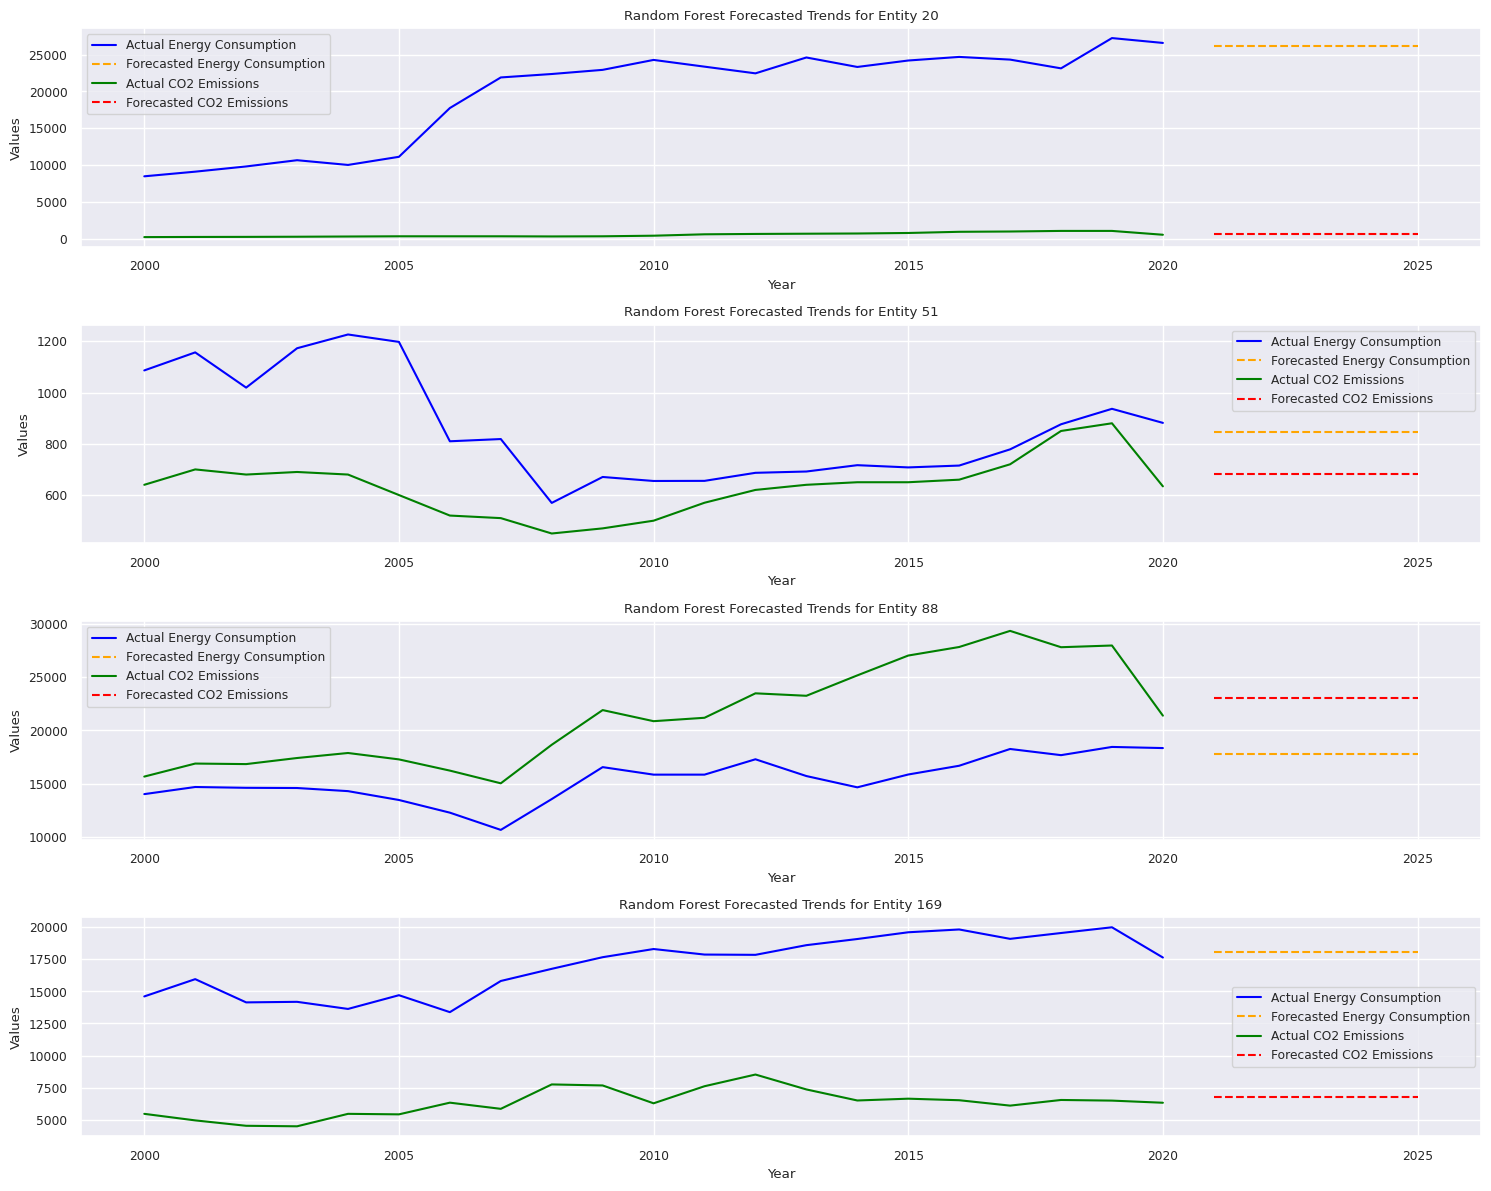

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Assuming df is your DataFrame containing the dataset
# Display the first few rows of the dataset
# print(df.head())

# Define feature columns and target columns
# Adjust these column names according to your dataset
feature_columns = [
    'Access to electricity (% of population)', 'Access to clean fuels for cooking',
    'Renewable energy share in the total final energy consumption (%)',
    'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
    'Low-carbon electricity (% electricity)', 'gdp_per_capita',
    'Land Area(Km2)', 'Latitude', 'Year'
]
target_columns = [
    'Primary energy consumption per capita (kWh/person)',
    'Value_co2_emissions_kt_by_country'
]

# Ensure the data is sorted by the time variable
df = df.sort_values(by='Year')

# List of entities to predict for
entities = [20, 51, 88, 169]

# Initialize plots
plt.figure(figsize=(15, 12))

# Loop through each entity to train and predict
for idx, entity in enumerate(entities):
    # Filter data for the entity
    entity_data = df[df['Entity'] == entity]

    # Split the data into training and forecasting sets
    train_data = entity_data[entity_data['Year'] <= 2020]
    forecast_years = np.arange(2021, 2026)
    forecast_data = pd.DataFrame({
        'Year': forecast_years,
        'Access to electricity (% of population)': np.nan,  # Replace np.nan with actual or estimated values
        'Access to clean fuels for cooking': np.nan,  # Replace np.nan with actual or estimated values
        'Renewable energy share in the total final energy consumption (%)': np.nan,  # Replace np.nan with actual or estimated values
        'Electricity from fossil fuels (TWh)': np.nan,  # Replace np.nan with actual or estimated values
        'Electricity from nuclear (TWh)': np.nan,  # Replace np.nan with actual or estimated values
        'Low-carbon electricity (% electricity)': np.nan,  # Replace np.nan with actual or estimated values
        'gdp_per_capita': np.nan,  # Replace np.nan with actual or estimated values
        'Land Area(Km2)': entity_data['Land Area(Km2)'].iloc[0],  # Assuming constant land area
        'Latitude': entity_data['Latitude'].iloc[0],  # Assuming constant latitude
    })

    # Impute missing values for forecast data with the latest available data
    for col in forecast_data.columns:
        if col not in ['Year', 'Land Area(Km2)', 'Latitude']:
            forecast_data[col].fillna(train_data[col].iloc[-1], inplace=True)

    # Separate features and targets for training
    X_train = train_data[feature_columns]
    y_energy_train = train_data['Primary energy consumption per capita (kWh/person)']
    y_co2_train = train_data['Value_co2_emissions_kt_by_country']

    # Initialize the Random Forest Regressor
    model_energy = RandomForestRegressor(random_state=42)
    model_co2 = RandomForestRegressor(random_state=42)

    # Train the models
    model_energy.fit(X_train, y_energy_train)
    model_co2.fit(X_train, y_co2_train)

    # Predict energy consumption and CO2 emissions for the forecast period
    X_forecast = forecast_data[feature_columns]
    y_pred_energy_forecast = model_energy.predict(X_forecast)
    y_pred_co2_forecast = model_co2.predict(X_forecast)

    # Visualize the forecasted trend for the current entity
    plt.subplot(len(entities), 1, idx + 1)

    # Plot actual energy consumption data
    plt.plot(train_data['Year'], y_energy_train, label='Actual Energy Consumption', color='blue')

    # Plot forecasted energy consumption data
    plt.plot(forecast_years, y_pred_energy_forecast, label='Forecasted Energy Consumption', linestyle='dashed', color='orange')

    # Plot actual CO2 emission data
    plt.plot(train_data['Year'], y_co2_train, label='Actual CO2 Emissions', color='green')

    # Plot forecasted CO2 emission data
    plt.plot(forecast_years, y_pred_co2_forecast, label='Forecasted CO2 Emissions', linestyle='dashed', color='red')

    plt.title(f'Random Forest Forecasted Trends for Entity {entity}')
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except fo

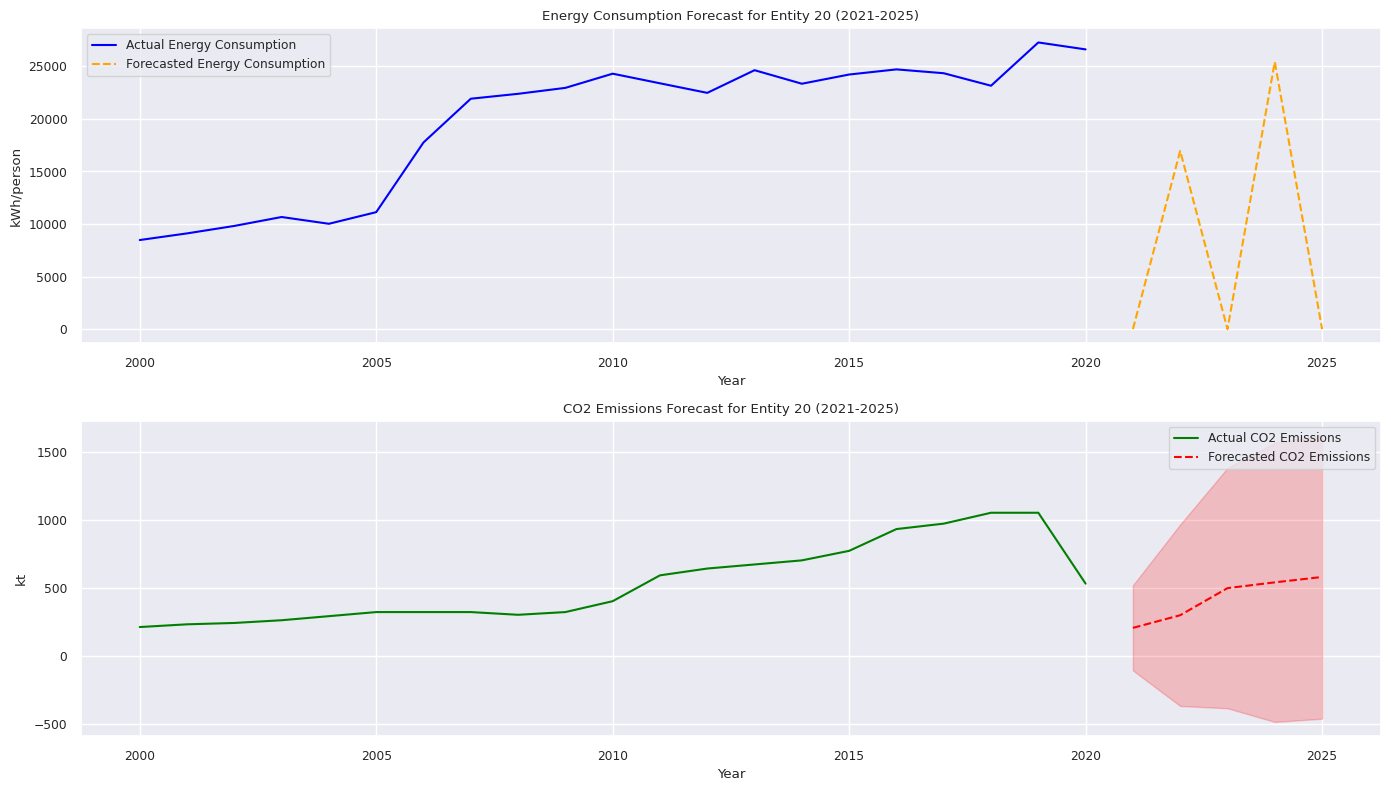

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except fo

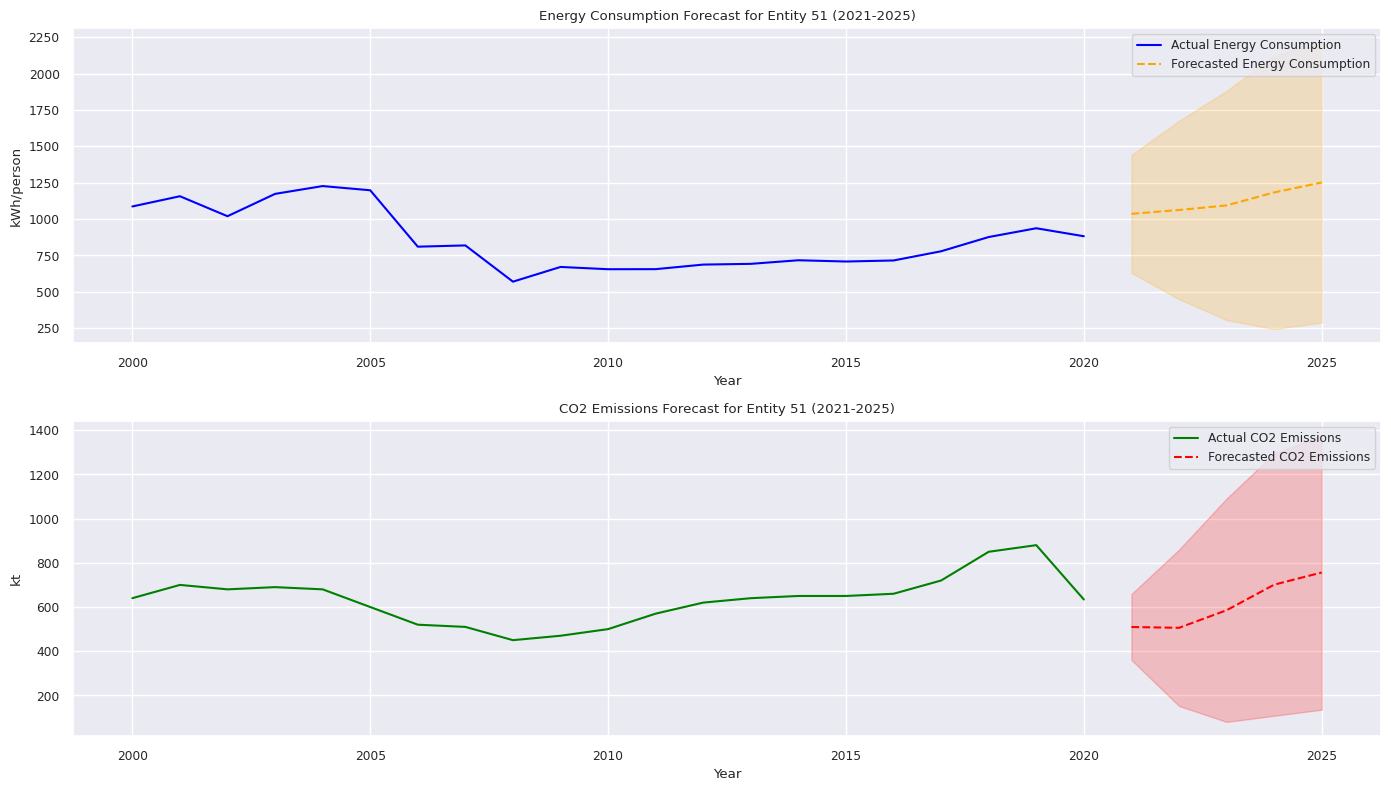

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  w

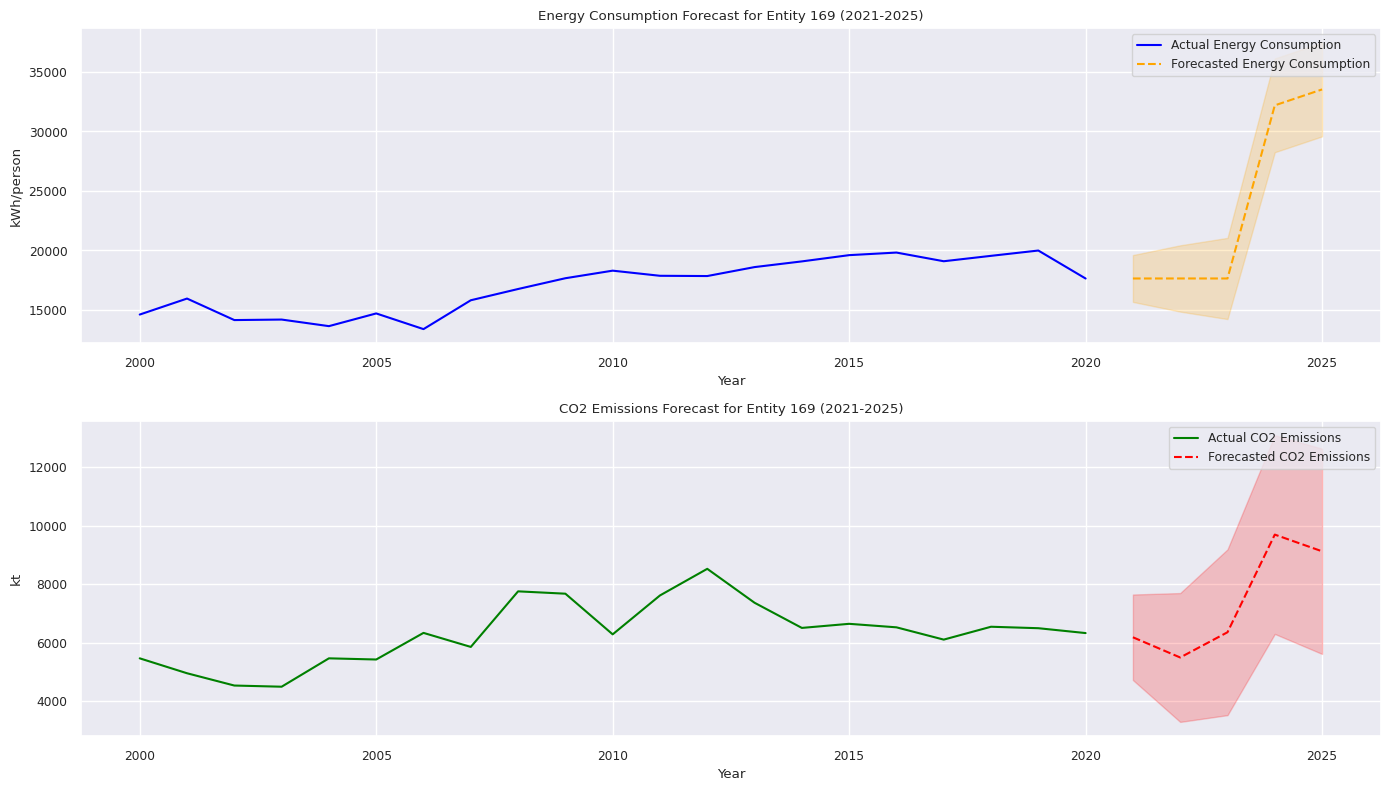

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming df is your DataFrame containing the dataset
# Display the first few rows of the dataset (commented out here)
# print(df.head())

# Define feature columns and target columns
# Adjust these column names according to your dataset
energy_column = 'Primary energy consumption per capita (kWh/person)'
co2_column = 'Value_co2_emissions_kt_by_country'

# Ensure the data is sorted by the time variable
df = df.sort_values(by='Year')

# Define the entities for forecasting
entities = [20, 51, 169]

# Iterate over each entity
for entity in entities:
    # Filter data for the current entity and select relevant columns
    entity_data = df[df['Entity'] == entity]
    entity_data = entity_data[['Year', energy_column, co2_column]]

    # Split data into training (up to 2019) and testing (2021 to 2025)
    train_data = entity_data[entity_data['Year'] <= 2020]

    # Train SARIMAX models for energy consumption and CO2 emissions
    # Define SARIMAX parameters (order and seasonal_order)
    order_energy = (1, 1, 1)  # Example order for SARIMAX
    seasonal_order_energy = (1, 1, 1, 12)  # Example seasonal_order for SARIMAX
    order_co2 = (1, 1, 1)  # Example order for SARIMAX
    seasonal_order_co2 = (1, 1, 1, 12)  # Example seasonal_order for SARIMAX

    # Fit SARIMAX models
    model_energy = SARIMAX(train_data[energy_column], order=order_energy, seasonal_order=seasonal_order_energy)
    model_co2 = SARIMAX(train_data[co2_column], order=order_co2, seasonal_order=seasonal_order_co2)
    results_energy = model_energy.fit()
    results_co2 = model_co2.fit()

    # Forecast energy consumption and CO2 emissions for the next 5 years
    forecast_energy = results_energy.get_forecast(steps=5)
    forecast_co2 = results_co2.get_forecast(steps=5)

    # Extract forecasted values
    forecast_energy_values = forecast_energy.predicted_mean
    forecast_co2_values = forecast_co2.predicted_mean

    # Extract confidence intervals
    conf_int_energy = forecast_energy.conf_int()
    conf_int_co2 = forecast_co2.conf_int()

    # Prepare data for plotting
    forecast_years = range(2021, 2026)

    plt.figure(figsize=(14, 8))

    # Plot actual and forecasted energy consumption
    plt.subplot(2, 1, 1)
    plt.plot(train_data['Year'], train_data[energy_column], label='Actual Energy Consumption', color='blue')
    plt.plot(forecast_years, forecast_energy_values, label='Forecasted Energy Consumption', linestyle='dashed', color='orange')
    plt.fill_between(forecast_years, conf_int_energy.iloc[:, 0], conf_int_energy.iloc[:, 1], color='orange', alpha=0.2)
    plt.title(f'Energy Consumption Forecast for Entity {entity} (2021-2025)')
    plt.xlabel('Year')
    plt.ylabel('kWh/person')
    plt.legend()
    plt.grid(True)

    # Plot actual and forecasted CO2 emissions
    plt.subplot(2, 1, 2)
    plt.plot(train_data['Year'], train_data[co2_column], label='Actual CO2 Emissions', color='green')
    plt.plot(forecast_years, forecast_co2_values, label='Forecasted CO2 Emissions', linestyle='dashed', color='red')
    plt.fill_between(forecast_years, conf_int_co2.iloc[:, 0], conf_int_co2.iloc[:, 1], color='red', alpha=0.2)
    plt.title(f'CO2 Emissions Forecast for Entity {entity} (2021-2025)')
    plt.xlabel('Year')
    plt.ylabel('kt')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

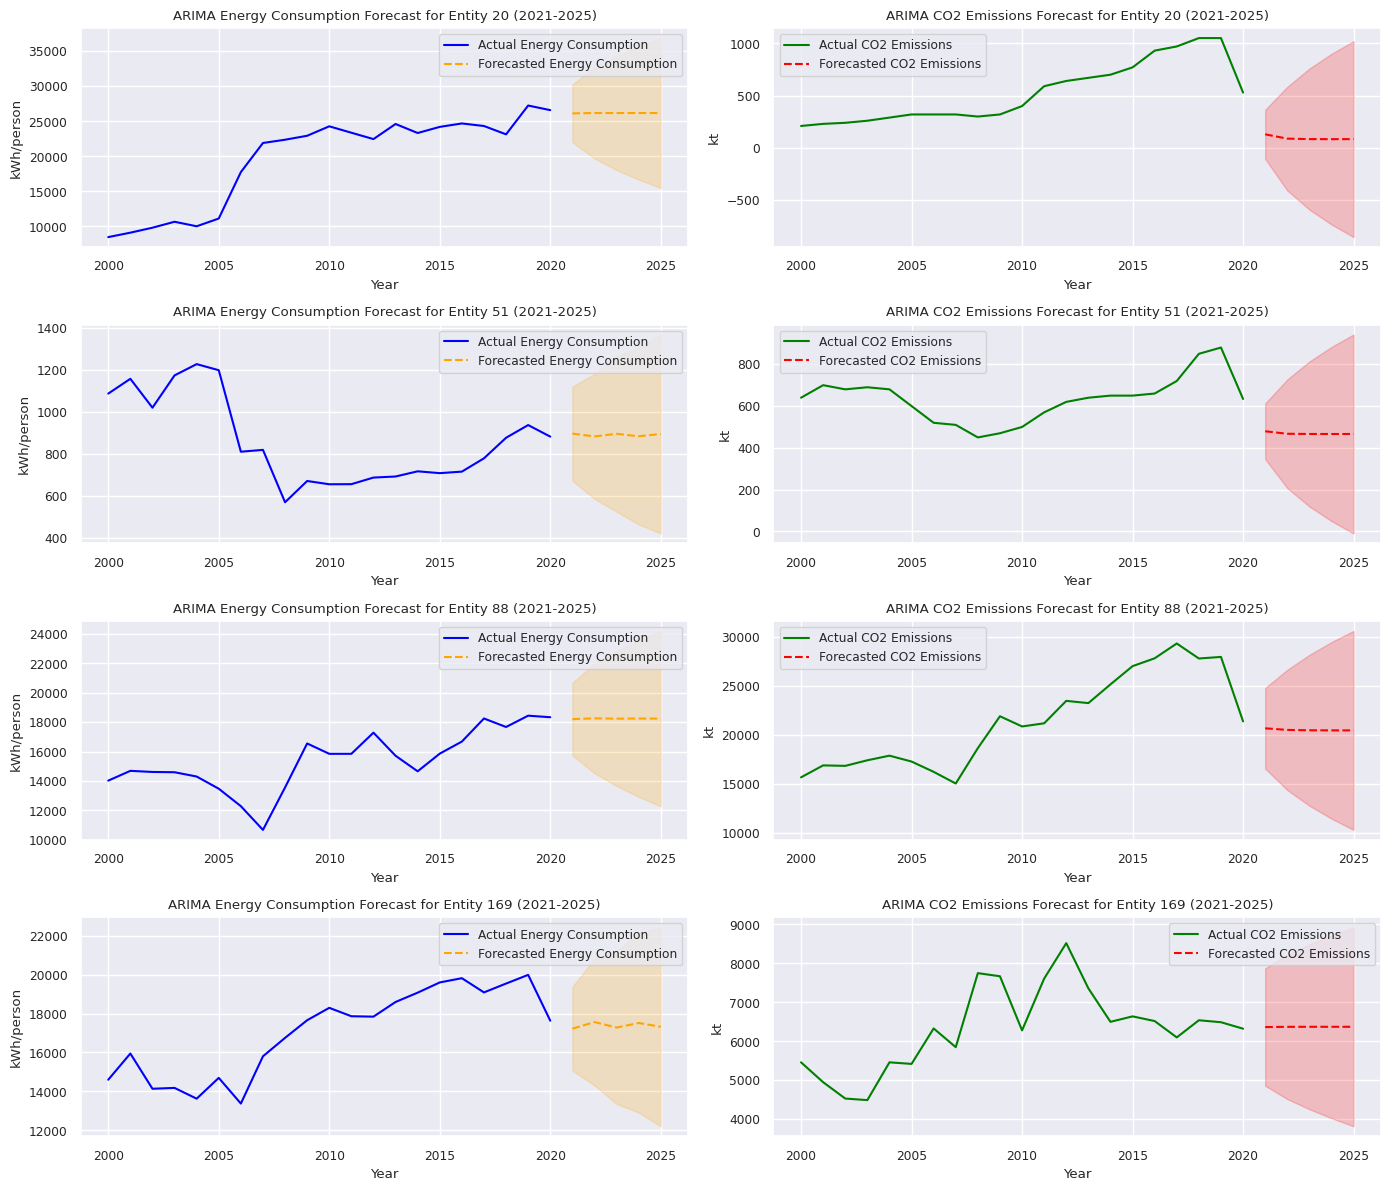

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming df is your DataFrame containing the dataset
# Display the first few rows of the dataset (commented out here)
# print(df.head())

# Define feature columns and target columns
# Adjust these column names according to your dataset
energy_column = 'Primary energy consumption per capita (kWh/person)'
co2_column = 'Value_co2_emissions_kt_by_country'

# Ensure the data is sorted by the time variable
df = df.sort_values(by='Year')

# Define the entities for forecasting
entities = [20, 51, 88, 169]

# Prepare the figure for plotting
plt.figure(figsize=(14, 12))

# Iterate over each entity and plot in subplots
for i, entity in enumerate(entities):
    # Filter data for the current entity and select relevant columns
    entity_data = df[df['Entity'] == entity]
    entity_data = entity_data[['Year', energy_column, co2_column]]

    # Split data into training (up to 2020) and testing (2021 to 2025)
    train_data = entity_data[entity_data['Year'] <= 2020]

    # Train ARIMA models for energy consumption and CO2 emissions
    # Define ARIMA parameters (order)
    order_energy = (1, 1, 1)  # Example order for ARIMA
    order_co2 = (1, 1, 1)  # Example order for ARIMA

    # Fit ARIMA models
    model_energy = ARIMA(train_data[energy_column], order=order_energy)
    model_co2 = ARIMA(train_data[co2_column], order=order_co2)
    results_energy = model_energy.fit()
    results_co2 = model_co2.fit()

    # Forecast energy consumption and CO2 emissions for the next 5 years
    forecast_energy = results_energy.get_forecast(steps=5)
    forecast_co2 = results_co2.get_forecast(steps=5)

    # Extract forecasted values
    forecast_energy_values = forecast_energy.predicted_mean
    forecast_co2_values = forecast_co2.predicted_mean

    # Extract confidence intervals
    conf_int_energy = forecast_energy.conf_int()
    conf_int_co2 = forecast_co2.conf_int()

    # Prepare data for plotting
    forecast_years = range(2021, 2025 + 1)  # 2021 to 2025 inclusive

    # Plot actual and forecasted energy consumption
    plt.subplot(4, 2, i * 2 + 1)
    plt.plot(train_data['Year'], train_data[energy_column], label='Actual Energy Consumption', color='blue')
    plt.plot(forecast_years, forecast_energy_values, label='Forecasted Energy Consumption', linestyle='dashed', color='orange')
    plt.fill_between(forecast_years, conf_int_energy.iloc[:, 0], conf_int_energy.iloc[:, 1], color='orange', alpha=0.2)
    plt.title(f'ARIMA Energy Consumption Forecast for Entity {entity} (2021-2025)')
    plt.xlabel('Year')
    plt.ylabel('kWh/person')
    plt.legend()
    plt.grid(True)

    # Plot actual and forecasted CO2 emissions
    plt.subplot(4, 2, i * 2 + 2)
    plt.plot(train_data['Year'], train_data[co2_column], label='Actual CO2 Emissions', color='green')
    plt.plot(forecast_years, forecast_co2_values, label='Forecasted CO2 Emissions', linestyle='dashed', color='red')
    plt.fill_between(forecast_years, conf_int_co2.iloc[:, 0], conf_int_co2.iloc[:, 1], color='red', alpha=0.2)
    plt.title(f'ARIMA CO2 Emissions Forecast for Entity {entity} (2021-2025)')
    plt.xlabel('Year')
    plt.ylabel('kt')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Lists to store evaluation metrics
energy_rmse_list = []
energy_mae_list = []
energy_r2_list = []
co2_rmse_list = []
co2_mae_list = []
co2_r2_list = []

# Iterate over each entity
for entity in entities:
    # Filter data for the current entity and select relevant columns
    entity_data = df[df['Entity'] == entity]
    entity_data = entity_data[['Year', energy_column, co2_column]]

    # Split data into training (up to 2020) and testing (2021 to 2025)
    train_data = entity_data[entity_data['Year'] <= 2015]
    test_data = entity_data[(entity_data['Year'] >= 2016) & (entity_data['Year'] <= 2025)]

    # Fit ARIMA models and make forecasts
    # (code to fit ARIMA models and make forecasts goes here)

    # Calculate evaluation metrics for energy consumption
    energy_rmse = mean_squared_error(test_data[energy_column], forecast_energy_values, squared=False)
    energy_mae = mean_absolute_error(test_data[energy_column], forecast_energy_values)
    energy_r2 = r2_score(test_data[energy_column], forecast_energy_values)

    # Calculate evaluation metrics for CO2 emissions
    co2_rmse = mean_squared_error(test_data[co2_column], forecast_co2_values, squared=False)
    co2_mae = mean_absolute_error(test_data[co2_column], forecast_co2_values)
    co2_r2 = r2_score(test_data[co2_column], forecast_co2_values)

    # Append evaluation metrics to the lists
    energy_rmse_list.append(energy_rmse)
    energy_mae_list.append(energy_mae)
    energy_r2_list.append(energy_r2)
    co2_rmse_list.append(co2_rmse)
    co2_mae_list.append(co2_mae)
    co2_r2_list.append(co2_r2)

# Calculate average evaluation metrics across entities
avg_energy_rmse = sum(energy_rmse_list) / len(entities)
avg_energy_mae = sum(energy_mae_list) / len(entities)
avg_energy_r2 = sum(energy_r2_list) / len(entities)
avg_co2_rmse = sum(co2_rmse_list) / len(entities)
avg_co2_mae = sum(co2_mae_list) / len(entities)
avg_co2_r2 = sum(co2_r2_list) / len(entities)

# Print average evaluation metrics
print("ARIMA Average Evaluation Metrics:")
print(f"Energy RMSE: {avg_energy_rmse}")
print(f"Energy MAE: {avg_energy_mae}")
print(f"Energy R-squared: {avg_energy_r2}")
print(f"CO2 RMSE: {avg_co2_rmse}")
print(f"CO2 MAE: {avg_co2_mae}")
print(f"CO2 R-squared: {avg_co2_r2}")


ARIMA Average Evaluation Metrics:
Energy RMSE: 6818.183728165436
Energy MAE: 6727.84568629611
Energy R-squared: -10785.32333260248
CO2 RMSE: 7982.186019001613
CO2 MAE: 7929.520584335578
CO2 R-squared: -1012.3795475334308


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

# Load your dataset and ensure it's sorted by time
# df = pd.read_csv("your_dataset.csv")
# df = df.sort_values(by='Year')

# Define feature columns and target columns
# Adjust these column names according to your dataset
energy_column = 'Primary energy consumption per capita (kWh/person)'
co2_column = 'Value_co2_emissions_kt_by_country'

# Define the entities for forecasting
entities = [20, 51, 88, 169]

# Define the range of hyperparameters to search
p_values = range(3)  # Adjust as needed
d_values = range(3)  # Adjust as needed
q_values = range(3)  # Adjust as needed

# Perform grid search for each entity
for entity in entities:
    # Filter data for the current entity and select relevant columns
    entity_data = df[df['Entity'] == entity]
    entity_data = entity_data[['Year', energy_column, co2_column]]

    # Split data into training and testing sets
    train_data = entity_data[entity_data['Year'] <= 2020]

    # Define the range of hyperparameters to search
    hyperparameters = product(p_values, d_values, q_values)

    best_aic = float("inf")
    best_params = None

    for params in hyperparameters:
        try:
            # Fit ARIMA model
            model = ARIMA(train_data[energy_column], order=params)
            results = model.fit()

            # Calculate AIC (Akaike Information Criterion)
            aic = results.aic

            # Update best hyperparameters if AIC is lower
            if aic < best_aic:
                best_aic = aic
                best_params = params

        except:
            continue

    print(f"Best ARIMA hyperparameters for Entity {entity}: {best_params}, AIC: {best_aic}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Best ARIMA hyperparameters for Entity 20: (0, 2, 1), AIC: 350.91118867433585


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Best ARIMA hyperparameters for Entity 51: (0, 2, 1), AIC: 244.35063253525652


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Best ARIMA hyperparameters for Entity 88: (0, 2, 2), AIC: 339.2956770345962


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. foreca

Best ARIMA hyperparameters for Entity 169: (0, 2, 0), AIC: 337.01775726797445


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

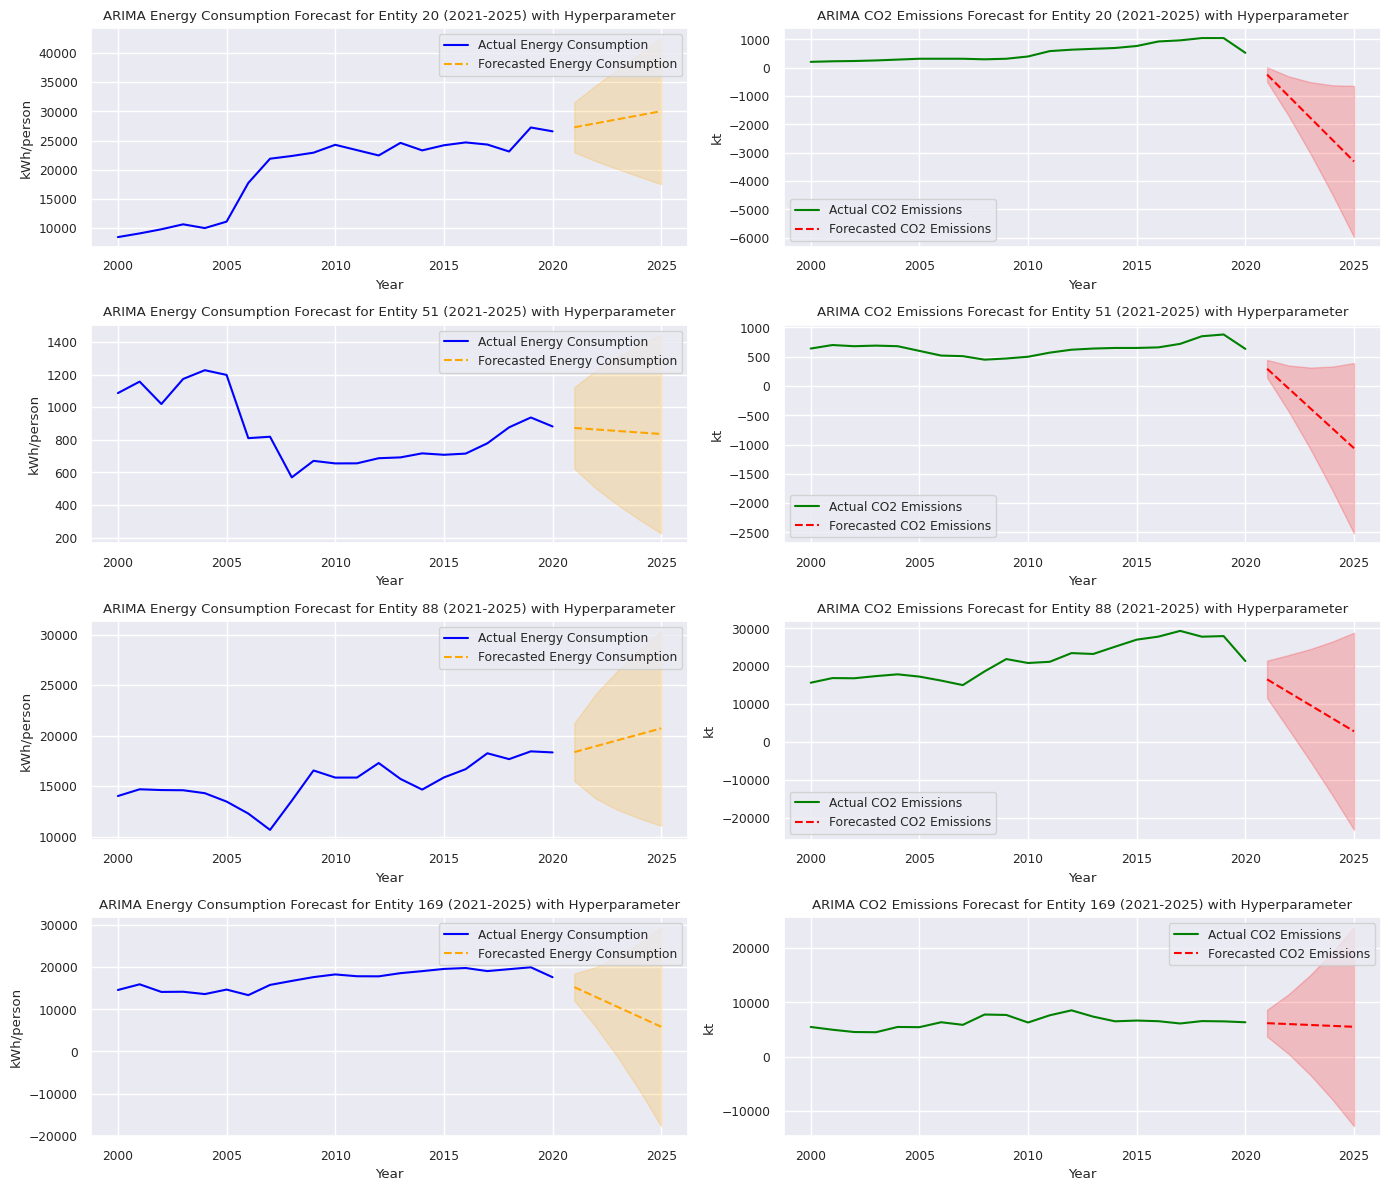

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming df is your DataFrame containing the dataset
# Display the first few rows of the dataset (commented out here)
# print(df.head())

# Define feature columns and target columns
# Adjust these column names according to your dataset
energy_column = 'Primary energy consumption per capita (kWh/person)'
co2_column = 'Value_co2_emissions_kt_by_country'

# Ensure the data is sorted by the time variable
df = df.sort_values(by='Year')

# Define the entities for forecasting
entities = [20, 51, 88, 169]

# Prepare the figure for plotting
plt.figure(figsize=(14, 12))

# Iterate over each entity and plot in subplots
for i, entity in enumerate(entities):
    # Filter data for the current entity and select relevant columns
    entity_data = df[df['Entity'] == entity]
    entity_data = entity_data[['Year', energy_column, co2_column]]

    # Split data into training (up to 2019) and testing (2021 to 2025)
    train_data = entity_data[entity_data['Year'] <= 2020]

    # Train ARIMA models for energy consumption and CO2 emissions
    # Get best hyperparameters
    if entity == 20:
        order_energy = (0, 2, 1)
        order_co2 = (0, 2, 1)
    elif entity == 51:
        order_energy = (0, 2, 1)
        order_co2 = (0, 2, 1)
    elif entity == 88:
        order_energy = (0, 2, 2)
        order_co2 = (0, 2, 2)
    elif entity == 169:
        order_energy = (0, 2, 0)
        order_co2 = (0, 2, 0)

    # Fit ARIMA models
    model_energy = ARIMA(train_data[energy_column], order=order_energy)
    model_co2 = ARIMA(train_data[co2_column], order=order_co2)
    results_energy = model_energy.fit()
    results_co2 = model_co2.fit()

    # Forecast energy consumption and CO2 emissions for the next 5 years
    forecast_energy = results_energy.get_forecast(steps=5)
    forecast_co2 = results_co2.get_forecast(steps=5)

    # Extract forecasted values
    forecast_energy_values = forecast_energy.predicted_mean
    forecast_co2_values = forecast_co2.predicted_mean

    # Extract confidence intervals
    conf_int_energy = forecast_energy.conf_int()
    conf_int_co2 = forecast_co2.conf_int()

    # Prepare data for plotting
    forecast_years = range(2021, 2025 + 1)  # 2021 to 2025 inclusive

    # Plot actual and forecasted energy consumption
    plt.subplot(4, 2, i * 2 + 1)
    plt.plot(train_data['Year'], train_data[energy_column], label='Actual Energy Consumption', color='blue')
    plt.plot(forecast_years, forecast_energy_values, label='Forecasted Energy Consumption', linestyle='dashed', color='orange')
    plt.fill_between(forecast_years, conf_int_energy.iloc[:, 0], conf_int_energy.iloc[:, 1], color='orange', alpha=0.2)
    plt.title(f'ARIMA Energy Consumption Forecast for Entity {entity} (2021-2025) with Hyperparameter')
    plt.xlabel('Year')
    plt.ylabel('kWh/person')
    plt.legend()
    plt.grid(True)

    # Plot actual and forecasted CO2 emissions
    plt.subplot(4, 2, i * 2 + 2)
    plt.plot(train_data['Year'], train_data[co2_column], label='Actual CO2 Emissions', color='green')
    plt.plot(forecast_years, forecast_co2_values, label='Forecasted CO2 Emissions', linestyle='dashed', color='red')
    plt.fill_between(forecast_years, conf_int_co2.iloc[:, 0], conf_int_co2.iloc[:, 1], color='red', alpha=0.2)
    plt.title(f'ARIMA CO2 Emissions Forecast for Entity {entity} (2021-2025) with Hyperparameter')
    plt.xlabel('Year')
    plt.ylabel('kt')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Lists to store evaluation metrics
energy_rmse_list = []
energy_mae_list = []
energy_r2_list = []
co2_rmse_list = []
co2_mae_list = []
co2_r2_list = []

# Iterate over each entity
for entity in entities:
    # Filter data for the current entity and select relevant columns
    entity_data = df[df['Entity'] == entity]
    entity_data = entity_data[['Year', energy_column, co2_column]]

    # Split data into training (up to 2015) and testing (2016 to 2020)
    train_data = entity_data[(entity_data['Year'] >= 2000) & (entity_data['Year'] <= 2015)]
    test_data = entity_data[(entity_data['Year'] >= 2016) & (entity_data['Year'] <= 2020)]

    # Define the ARIMA hyperparameters based on entity
    if entity == 20:
        order_energy = (0, 2, 1)
        order_co2 = (0, 2, 1)
    elif entity == 51:
        order_energy = (0, 2, 1)
        order_co2 = (0, 2, 1)
    elif entity == 88:
        order_energy = (0, 2, 2)
        order_co2 = (0, 2, 2)
    elif entity == 169:
        order_energy = (0, 2, 0)
        order_co2 = (0, 2, 0)

    # Fit ARIMA models
    model_energy = ARIMA(train_data[energy_column], order=order_energy)
    model_co2 = ARIMA(train_data[co2_column], order=order_co2)
    results_energy = model_energy.fit()
    results_co2 = model_co2.fit()

    # Forecast energy consumption and CO2 emissions for the test period
    forecast_energy = results_energy.forecast(steps=len(test_data))
    forecast_co2 = results_co2.forecast(steps=len(test_data))

    # Extract forecasted values
    forecast_energy_values = forecast_energy
    forecast_co2_values = forecast_co2

    # Calculate evaluation metrics for energy consumption
    energy_rmse = np.sqrt(mean_squared_error(test_data[energy_column], forecast_energy_values))
    energy_mae = mean_absolute_error(test_data[energy_column], forecast_energy_values)
    energy_r2 = r2_score(test_data[energy_column], forecast_energy_values)

    # Calculate evaluation metrics for CO2 emissions
    co2_rmse = np.sqrt(mean_squared_error(test_data[co2_column], forecast_co2_values))
    co2_mae = mean_absolute_error(test_data[co2_column], forecast_co2_values)
    co2_r2 = r2_score(test_data[co2_column], forecast_co2_values)

    # Append evaluation metrics to the lists
    energy_rmse_list.append(energy_rmse)
    energy_mae_list.append(energy_mae)
    energy_r2_list.append(energy_r2)
    co2_rmse_list.append(co2_rmse)
    co2_mae_list.append(co2_mae)
    co2_r2_list.append(co2_r2)

# Calculate average evaluation metrics across entities
avg_energy_rmse = np.mean(energy_rmse_list)
avg_energy_mae = np.mean(energy_mae_list)
avg_energy_r2 = np.mean(energy_r2_list)
avg_co2_rmse = np.mean(co2_rmse_list)
avg_co2_mae = np.mean(co2_mae_list)
avg_co2_r2 = np.mean(co2_r2_list)

# Print average evaluation metrics
print("ARIMA Average Evaluation Metrics after Hyperparameter Tuning:")
print(f"Energy RMSE: {avg_energy_rmse}")
print(f"Energy MAE: {avg_energy_mae}")
print(f"Energy R-squared: {avg_energy_r2}")
print(f"CO2 RMSE: {avg_co2_rmse}")
print(f"CO2 MAE: {avg_co2_mae}")
print(f"CO2 R-squared: {avg_co2_r2}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

ARIMA Average Evaluation Metrics after Hyperparameter Tuning:
Energy RMSE: 1168.6375157712341
Energy MAE: 915.6226540298444
Energy R-squared: -3.5081746694695397
CO2 RMSE: 1702.1099020039392
CO2 MAE: 1192.3230163938347
CO2 R-squared: -5.514118128788648


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Assuming df is your DataFrame containing the dataset
# # Display the first few rows of the dataset
# print(df.head())

# # Define feature columns and target columns
# # Adjust these column names according to your dataset
# feature_columns = [
#     'Access to electricity (% of population)', 'Access to clean fuels for cooking',
#     'Renewable energy share in the total final energy consumption (%)',
#     'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
#     'Low-carbon electricity (% electricity)', 'gdp_per_capita',
#     'Land Area(Km2)', 'Latitude', 'Year'
# ]
# energy_column = 'Primary energy consumption per capita (kWh/person)'
# co2_column = 'Value_co2_emissions_kt_by_country'

# # Ensure the data is sorted by the time variable
# df = df.sort_values(by='Year')

# # Define the entities for forecasting
# entities = [20, 51, 169]

# # Initialize lists to store forecasted values for each entity
# forecast_energy_values_all = []
# forecast_co2_values_all = []

# # Iterate over each entity
# for entity in entities:
#     # Filter data for the current entity and select relevant columns
#     entity_data = df[df['Entity'] == entity]
#     entity_data = entity_data[['Year', energy_column, co2_column]]

#     # Split data into training (up to 2020) and testing (2021 to 2025)
#     train_data = entity_data[entity_data['Year'] <= 2020]

#     # Train SARIMAX models for energy consumption and CO2 emissions
#     # Define SARIMAX parameters (order and seasonal_order)
#     order_energy = (1, 1, 1)  # Example order for SARIMAX
#     seasonal_order_energy = (1, 1, 1, 12)  # Example seasonal_order for SARIMAX
#     order_co2 = (1, 1, 1)  # Example order for SARIMAX
#     seasonal_order_co2 = (1, 1, 1, 12)  # Example seasonal_order for SARIMAX

#     # Fit SARIMAX models
#     model_energy = SARIMAX(train_data[energy_column], order=order_energy, seasonal_order=seasonal_order_energy)
#     model_co2 = SARIMAX(train_data[co2_column], order=order_co2, seasonal_order=seasonal_order_co2)
#     results_energy = model_energy.fit()
#     results_co2 = model_co2.fit()

#     # Forecast energy consumption and CO2 emissions for the next 5 years
#     forecast_energy = results_energy.get_forecast(steps=5)
#     forecast_co2 = results_co2.get_forecast(steps=5)

#     # Extract forecasted values
#     forecast_energy_values = forecast_energy.predicted_mean
#     forecast_co2_values = forecast_co2.predicted_mean

#     # Append forecasted values to the lists
#     forecast_energy_values_all.append(forecast_energy_values)
#     forecast_co2_values_all.append(forecast_co2_values)

# # Visualize the forecasted trends for all entities using matplotlib
# plt.figure(figsize=(10, 6))

# # Plot forecasted energy consumption data for all entities
# for i, entity in enumerate(entities):
#     plt.plot(range(2021, 2026), forecast_energy_values_all[i], label=f'Entity {entity} - Energy Consumption', linestyle='dashed')

# # Plot forecasted CO2 emission data for all entities
# for i, entity in enumerate(entities):
#     plt.plot(range(2021, 2026), forecast_co2_values_all[i], label=f'Entity {entity} - CO2 Emissions', linestyle='dashed')

# plt.title('Forecasted Trends for Entities (2021-2025)')
# plt.xlabel('Year')
# plt.ylabel('Values')
# plt.legend()
# plt.grid(True)

# plt.show()
